# LSTM test by data2000-10*512 to 1*512
# 600 steps with lr = 0.001
# batch size = 500
# no dropout
# units = 512

Results are better than
best run: 
            


In [1]:
%matplotlib inline
import matplotlib


import numpy as np

np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense, Flatten,LSTM, TimeDistributed, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras import backend as K
import matplotlib.pyplot as plt

TIME_STEPS = 10
INPUT_SIZE = 512
BATCH_SIZE = 250
BATCH_INDEX = 0
OUTPUT_SIZE = 512
#CELL_SIZE = 800
LR = 0.001


           
           
# loading data
X_train = np.loadtxt("0307_spec_train_280000data_10columns.txt")
y_train = np.loadtxt("0307_mask_train_280000data_1columns.txt")

#X_test = np.loadtxt("0220_spec_test_1000*5120.txt")
#y_test = np.loadtxt("0220_mask_test_1000*512.txt")

# batch_size=y_test.shape[0]

# data pre-processing
X_train = X_train[0:1000]
y_train = y_train[0:1000]
X_train = X_train.reshape(-1, 10, 512)
#y_train = y_train.reshape(-1, 3, 512)
#X_test = X_test.reshape(-1, 10, 512)
#y_test = y_test.reshape(-1, 3, 512)




/home/william/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#X_train.shape
y_train.shape

(1000, 512)

Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/5000
750/750 [==============================] - 1s 1ms/step - loss: 0.2418 - acc: 0.0000e+00 - val_loss: 0.2065 - val_acc: 0.0000e+00
Epoch 2/5000
750/750 [==============================] - 0s 69us/step - loss: 0.1672 - acc: 0.0000e+00 - val_loss: 0.0982 - val_acc: 0.0000e+00
Epoch 3/5000
750/750 [==============================] - 0s 68us/step - loss: 0.0765 - acc: 0.0120 - val_loss: 0.0495 - val_acc: 0.0000e+00
Epoch 4/5000
750/750 [==============================] - 0s 68us/step - loss: 0.0438 - acc: 0.0480 - val_loss: 0.0373 - val_acc: 0.0720
Epoch 5/5000
750/750 [==============================] - 0s 68us/step - loss: 0.0358 - acc: 0.0720 - val_loss: 0.0340 - val_acc: 0.0760
Epoch 6/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0335 - acc: 0.0720 - val_loss: 0.0329 - val_acc: 0.0520
Epoch 7/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0327 - acc: 0.0

750/750 [==============================] - 0s 60us/step - loss: 0.0274 - acc: 0.0560 - val_loss: 0.0277 - val_acc: 0.0600
Epoch 61/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0269 - acc: 0.0760 - val_loss: 0.0273 - val_acc: 0.0680
Epoch 62/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0265 - acc: 0.0747 - val_loss: 0.0270 - val_acc: 0.0440
Epoch 63/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0262 - acc: 0.0627 - val_loss: 0.0270 - val_acc: 0.0400
Epoch 64/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0261 - acc: 0.0613 - val_loss: 0.0273 - val_acc: 0.0320
Epoch 65/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0268 - acc: 0.0787 - val_loss: 0.0274 - val_acc: 0.0600
Epoch 66/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0262 - acc: 0.0613 - val_loss: 0.0269 - val_acc: 0.0640
Epoch 67/5000
750/750 [==============================] - 0s 59

750/750 [==============================] - 0s 60us/step - loss: 0.0219 - acc: 0.0587 - val_loss: 0.0250 - val_acc: 0.0440
Epoch 121/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0215 - acc: 0.0760 - val_loss: 0.0243 - val_acc: 0.0440
Epoch 122/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0209 - acc: 0.0493 - val_loss: 0.0242 - val_acc: 0.0640
Epoch 123/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0208 - acc: 0.0600 - val_loss: 0.0242 - val_acc: 0.0560
Epoch 124/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0207 - acc: 0.0573 - val_loss: 0.0244 - val_acc: 0.0680
Epoch 125/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0207 - acc: 0.0573 - val_loss: 0.0243 - val_acc: 0.0360
Epoch 126/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0211 - acc: 0.0520 - val_loss: 0.0249 - val_acc: 0.0360
Epoch 127/5000
750/750 [==============================] 

Epoch 180/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0178 - acc: 0.1347 - val_loss: 0.0233 - val_acc: 0.0560
Epoch 181/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0173 - acc: 0.1067 - val_loss: 0.0227 - val_acc: 0.0720
Epoch 182/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0167 - acc: 0.1160 - val_loss: 0.0227 - val_acc: 0.0760
Epoch 183/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0167 - acc: 0.1093 - val_loss: 0.0228 - val_acc: 0.0760
Epoch 184/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0166 - acc: 0.1107 - val_loss: 0.0234 - val_acc: 0.0680
Epoch 185/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0171 - acc: 0.1240 - val_loss: 0.0232 - val_acc: 0.0800
Epoch 186/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0172 - acc: 0.1147 - val_loss: 0.0230 - val_acc: 0.0680
Epoch 187/5000
750/750 [=================

Epoch 240/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0137 - acc: 0.1467 - val_loss: 0.0229 - val_acc: 0.1120
Epoch 241/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0137 - acc: 0.1427 - val_loss: 0.0229 - val_acc: 0.1080
Epoch 242/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0138 - acc: 0.1667 - val_loss: 0.0227 - val_acc: 0.1000
Epoch 243/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0136 - acc: 0.1507 - val_loss: 0.0226 - val_acc: 0.1080
Epoch 244/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0134 - acc: 0.1507 - val_loss: 0.0228 - val_acc: 0.1000
Epoch 245/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0142 - acc: 0.1613 - val_loss: 0.0238 - val_acc: 0.0920
Epoch 246/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0138 - acc: 0.1733 - val_loss: 0.0226 - val_acc: 0.1160
Epoch 247/5000
750/750 [=================

Epoch 300/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0115 - acc: 0.2280 - val_loss: 0.0233 - val_acc: 0.1320
Epoch 301/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0109 - acc: 0.2160 - val_loss: 0.0234 - val_acc: 0.1720
Epoch 302/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0107 - acc: 0.2333 - val_loss: 0.0231 - val_acc: 0.1560
Epoch 303/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0108 - acc: 0.2133 - val_loss: 0.0234 - val_acc: 0.1640
Epoch 304/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0111 - acc: 0.2067 - val_loss: 0.0229 - val_acc: 0.1640
Epoch 305/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0107 - acc: 0.2200 - val_loss: 0.0232 - val_acc: 0.1480
Epoch 306/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0108 - acc: 0.2253 - val_loss: 0.0240 - val_acc: 0.1600
Epoch 307/5000
750/750 [=================

Epoch 360/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0090 - acc: 0.2507 - val_loss: 0.0244 - val_acc: 0.1800
Epoch 361/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0088 - acc: 0.2853 - val_loss: 0.0233 - val_acc: 0.1800
Epoch 362/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0085 - acc: 0.2853 - val_loss: 0.0232 - val_acc: 0.1920
Epoch 363/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0084 - acc: 0.2947 - val_loss: 0.0233 - val_acc: 0.1840
Epoch 364/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0085 - acc: 0.2867 - val_loss: 0.0255 - val_acc: 0.1880
Epoch 365/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0092 - acc: 0.2893 - val_loss: 0.0234 - val_acc: 0.2080
Epoch 366/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0086 - acc: 0.2933 - val_loss: 0.0233 - val_acc: 0.1920
Epoch 367/5000
750/750 [=================

Epoch 420/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0066 - acc: 0.3520 - val_loss: 0.0236 - val_acc: 0.2200
Epoch 421/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0066 - acc: 0.3613 - val_loss: 0.0238 - val_acc: 0.2200
Epoch 422/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0071 - acc: 0.3680 - val_loss: 0.0242 - val_acc: 0.2240
Epoch 423/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0071 - acc: 0.3493 - val_loss: 0.0239 - val_acc: 0.2080
Epoch 424/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0066 - acc: 0.3547 - val_loss: 0.0236 - val_acc: 0.2280
Epoch 425/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0067 - acc: 0.3453 - val_loss: 0.0245 - val_acc: 0.2160
Epoch 426/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0069 - acc: 0.3453 - val_loss: 0.0239 - val_acc: 0.2200
Epoch 427/5000
750/750 [=================

Epoch 480/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0056 - acc: 0.4173 - val_loss: 0.0241 - val_acc: 0.2440
Epoch 481/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0054 - acc: 0.4053 - val_loss: 0.0252 - val_acc: 0.2400
Epoch 482/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0052 - acc: 0.4053 - val_loss: 0.0245 - val_acc: 0.2320
Epoch 483/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0052 - acc: 0.4053 - val_loss: 0.0242 - val_acc: 0.2560
Epoch 484/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0053 - acc: 0.3920 - val_loss: 0.0258 - val_acc: 0.2240
Epoch 485/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0052 - acc: 0.4080 - val_loss: 0.0245 - val_acc: 0.2360
Epoch 486/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0051 - acc: 0.4160 - val_loss: 0.0250 - val_acc: 0.2400
Epoch 487/5000
750/750 [=================

Epoch 540/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0039 - acc: 0.4760 - val_loss: 0.0249 - val_acc: 0.2800
Epoch 541/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0039 - acc: 0.4613 - val_loss: 0.0249 - val_acc: 0.2600
Epoch 542/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0039 - acc: 0.4760 - val_loss: 0.0252 - val_acc: 0.3000
Epoch 543/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0042 - acc: 0.4547 - val_loss: 0.0251 - val_acc: 0.2600
Epoch 544/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0043 - acc: 0.4453 - val_loss: 0.0255 - val_acc: 0.2920
Epoch 545/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0040 - acc: 0.4667 - val_loss: 0.0251 - val_acc: 0.2640
Epoch 546/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0038 - acc: 0.4840 - val_loss: 0.0252 - val_acc: 0.2920
Epoch 547/5000
750/750 [=================

Epoch 600/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0031 - acc: 0.5133 - val_loss: 0.0253 - val_acc: 0.2640
Epoch 601/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0033 - acc: 0.4960 - val_loss: 0.0263 - val_acc: 0.2920
Epoch 602/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0032 - acc: 0.4987 - val_loss: 0.0256 - val_acc: 0.2880
Epoch 603/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0032 - acc: 0.5027 - val_loss: 0.0261 - val_acc: 0.2880
Epoch 604/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0030 - acc: 0.5400 - val_loss: 0.0252 - val_acc: 0.2880
Epoch 605/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0030 - acc: 0.5320 - val_loss: 0.0272 - val_acc: 0.2720
Epoch 606/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0031 - acc: 0.5053 - val_loss: 0.0249 - val_acc: 0.3280
Epoch 607/5000
750/750 [=================

Epoch 660/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0025 - acc: 0.5760 - val_loss: 0.0268 - val_acc: 0.3160
Epoch 661/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0023 - acc: 0.5987 - val_loss: 0.0262 - val_acc: 0.2960
Epoch 662/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0023 - acc: 0.5547 - val_loss: 0.0274 - val_acc: 0.3240
Epoch 663/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0024 - acc: 0.5867 - val_loss: 0.0258 - val_acc: 0.3280
Epoch 664/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0023 - acc: 0.5787 - val_loss: 0.0275 - val_acc: 0.3040
Epoch 665/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0026 - acc: 0.5360 - val_loss: 0.0256 - val_acc: 0.3440
Epoch 666/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0026 - acc: 0.5773 - val_loss: 0.0272 - val_acc: 0.3200
Epoch 667/5000
750/750 [=================

Epoch 720/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0018 - acc: 0.6360 - val_loss: 0.0274 - val_acc: 0.3320
Epoch 721/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0019 - acc: 0.6107 - val_loss: 0.0273 - val_acc: 0.3400
Epoch 722/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0022 - acc: 0.6053 - val_loss: 0.0265 - val_acc: 0.3080
Epoch 723/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0022 - acc: 0.5933 - val_loss: 0.0272 - val_acc: 0.3240
Epoch 724/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0018 - acc: 0.6480 - val_loss: 0.0269 - val_acc: 0.3200
Epoch 725/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0018 - acc: 0.6267 - val_loss: 0.0269 - val_acc: 0.3560
Epoch 726/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0019 - acc: 0.6427 - val_loss: 0.0268 - val_acc: 0.3160
Epoch 727/5000
750/750 [=================

Epoch 780/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0015 - acc: 0.7107 - val_loss: 0.0272 - val_acc: 0.3360
Epoch 781/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0015 - acc: 0.6853 - val_loss: 0.0274 - val_acc: 0.3640
Epoch 782/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0016 - acc: 0.6787 - val_loss: 0.0277 - val_acc: 0.3360
Epoch 783/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0017 - acc: 0.6547 - val_loss: 0.0276 - val_acc: 0.3320
Epoch 784/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 0.6520 - val_loss: 0.0283 - val_acc: 0.3440
Epoch 785/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0016 - acc: 0.6920 - val_loss: 0.0264 - val_acc: 0.3200
Epoch 786/5000
750/750 [==============================] - 0s 69us/step - loss: 0.0018 - acc: 0.6467 - val_loss: 0.0316 - val_acc: 0.3240
Epoch 787/5000
750/750 [=================

Epoch 840/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0020 - acc: 0.6080 - val_loss: 0.0311 - val_acc: 0.3480
Epoch 841/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0019 - acc: 0.6653 - val_loss: 0.0274 - val_acc: 0.3840
Epoch 842/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0014 - acc: 0.7547 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 843/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.7547 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 844/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.7547 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 845/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.7533 - val_loss: 0.0274 - val_acc: 0.3720
Epoch 846/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.7600 - val_loss: 0.0274 - val_acc: 0.3640
Epoch 847/5000
750/750 [=================

Epoch 900/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0016 - acc: 0.7213 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 901/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.7747 - val_loss: 0.0276 - val_acc: 0.3680
Epoch 902/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.8000 - val_loss: 0.0277 - val_acc: 0.3680
Epoch 903/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0013 - acc: 0.8067 - val_loss: 0.0276 - val_acc: 0.3760
Epoch 904/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.8013 - val_loss: 0.0279 - val_acc: 0.3640
Epoch 905/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0013 - acc: 0.7907 - val_loss: 0.0271 - val_acc: 0.3720
Epoch 906/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0016 - acc: 0.7280 - val_loss: 0.0325 - val_acc: 0.3520
Epoch 907/5000
750/750 [=================

Epoch 960/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0014 - acc: 0.7907 - val_loss: 0.0271 - val_acc: 0.3320
Epoch 961/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0021 - acc: 0.6880 - val_loss: 0.0275 - val_acc: 0.3560
Epoch 962/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.8067 - val_loss: 0.0275 - val_acc: 0.3760
Epoch 963/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.8293 - val_loss: 0.0275 - val_acc: 0.3720
Epoch 964/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.8307 - val_loss: 0.0276 - val_acc: 0.3720
Epoch 965/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.8347 - val_loss: 0.0276 - val_acc: 0.3720
Epoch 966/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.8413 - val_loss: 0.0276 - val_acc: 0.3720
Epoch 967/5000
750/750 [=================

750/750 [==============================] - 0s 66us/step - loss: 0.0013 - acc: 0.8493 - val_loss: 0.0279 - val_acc: 0.3840
Epoch 1020/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0012 - acc: 0.8573 - val_loss: 0.0280 - val_acc: 0.3840
Epoch 1021/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0012 - acc: 0.8613 - val_loss: 0.0279 - val_acc: 0.3880
Epoch 1022/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.8627 - val_loss: 0.0279 - val_acc: 0.3920
Epoch 1023/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.8693 - val_loss: 0.0279 - val_acc: 0.3920
Epoch 1024/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0012 - acc: 0.8627 - val_loss: 0.0279 - val_acc: 0.3880
Epoch 1025/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0012 - acc: 0.8827 - val_loss: 0.0279 - val_acc: 0.3800
Epoch 1026/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.8867 - val_loss: 0.0273 - val_acc: 0.3760
Epoch 1079/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.8973 - val_loss: 0.0273 - val_acc: 0.3720
Epoch 1080/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.8947 - val_loss: 0.0273 - val_acc: 0.3760
Epoch 1081/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.8987 - val_loss: 0.0273 - val_acc: 0.3680
Epoch 1082/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.8707 - val_loss: 0.0286 - val_acc: 0.3240
Epoch 1083/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0019 - acc: 0.7067 - val_loss: 0.0270 - val_acc: 0.3760
Epoch 1084/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0013 - acc: 0.8560 - val_loss: 0.0276 - val_acc: 0.3720
Epoch 1085/5000
750/750 [=========================

750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.8987 - val_loss: 0.0274 - val_acc: 0.3800
Epoch 1138/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9040 - val_loss: 0.0275 - val_acc: 0.3800
Epoch 1139/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.8987 - val_loss: 0.0274 - val_acc: 0.3800
Epoch 1140/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9133 - val_loss: 0.0274 - val_acc: 0.3760
Epoch 1141/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9133 - val_loss: 0.0274 - val_acc: 0.3760
Epoch 1142/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9240 - val_loss: 0.0274 - val_acc: 0.3760
Epoch 1143/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0012 - acc: 0.9133 - val_loss: 0.0275 - val_acc: 0.3760
Epoch 1144/5000
750/750 [=========================

750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9187 - val_loss: 0.0274 - val_acc: 0.3760
Epoch 1197/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9267 - val_loss: 0.0274 - val_acc: 0.3760
Epoch 1198/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9267 - val_loss: 0.0274 - val_acc: 0.3760
Epoch 1199/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9333 - val_loss: 0.0274 - val_acc: 0.3760
Epoch 1200/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9333 - val_loss: 0.0274 - val_acc: 0.3760
Epoch 1201/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9347 - val_loss: 0.0274 - val_acc: 0.3760
Epoch 1202/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9333 - val_loss: 0.0274 - val_acc: 0.3760
Epoch 1203/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9520 - val_loss: 0.0275 - val_acc: 0.3520
Epoch 1256/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0023 - acc: 0.6853 - val_loss: 0.0278 - val_acc: 0.3720
Epoch 1257/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0013 - acc: 0.8667 - val_loss: 0.0272 - val_acc: 0.3800
Epoch 1258/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0012 - acc: 0.8840 - val_loss: 0.0272 - val_acc: 0.3760
Epoch 1259/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0012 - acc: 0.8947 - val_loss: 0.0272 - val_acc: 0.3760
Epoch 1260/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.8920 - val_loss: 0.0272 - val_acc: 0.3760
Epoch 1261/5000
750/750 [==============================] - 0s 68us/step - loss: 0.0012 - acc: 0.8973 - val_loss: 0.0272 - val_acc: 0.3680
Epoch 1262/5000
750/750 [=========================

750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9293 - val_loss: 0.0272 - val_acc: 0.3840
Epoch 1315/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9307 - val_loss: 0.0272 - val_acc: 0.3840
Epoch 1316/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9333 - val_loss: 0.0272 - val_acc: 0.3800
Epoch 1317/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9307 - val_loss: 0.0272 - val_acc: 0.3800
Epoch 1318/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9413 - val_loss: 0.0272 - val_acc: 0.3800
Epoch 1319/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9387 - val_loss: 0.0272 - val_acc: 0.3800
Epoch 1320/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9533 - val_loss: 0.0272 - val_acc: 0.3800
Epoch 1321/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9547 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1374/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9613 - val_loss: 0.0273 - val_acc: 0.3680
Epoch 1375/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9587 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1376/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9627 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1377/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9627 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1378/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9680 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1379/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9693 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1380/5000
750/750 [=========================

750/750 [==============================] - 0s 63us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1433/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1434/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1435/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1436/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1437/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1438/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1439/5000
750/750 [=========================

750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1492/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1493/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1494/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1495/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1496/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1497/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1498/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1551/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1552/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1553/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1554/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1555/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1556/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1557/5000
750/750 [=========================

750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1610/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1611/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1612/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1613/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1614/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1615/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1616/5000
750/750 [=========================

750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1669/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1670/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1671/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1672/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1673/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1674/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1675/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1728/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1729/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1730/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1731/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1732/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1733/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1734/5000
750/750 [=========================

750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1787/5000
750/750 [==============================] - 0s 67us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1788/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1789/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1790/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1791/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1792/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1793/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1846/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1847/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1848/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1849/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1850/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1851/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1852/5000
750/750 [=========================

750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1905/5000
750/750 [==============================] - 0s 67us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1906/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1907/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1908/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1909/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1910/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1911/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1964/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1965/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1966/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1967/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1968/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1969/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 1970/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2023/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2024/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2025/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2026/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2027/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2028/5000
750/750 [==============================] - 0s 68us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2029/5000
750/750 [=========================

750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2082/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2083/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2084/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2085/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2086/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2087/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2088/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2141/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2142/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2143/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2144/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2145/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2146/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2147/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2200/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2201/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2202/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2203/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2204/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2205/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2206/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2259/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2260/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2261/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2262/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2263/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2264/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2265/5000
750/750 [=========================

750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2318/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2319/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2320/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2321/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2322/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2323/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2324/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2377/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2378/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2379/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2380/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2381/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2382/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2383/5000
750/750 [=========================

750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2436/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2437/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2438/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2439/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2440/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2441/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2442/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2495/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2496/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2497/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2498/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2499/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2500/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2501/5000
750/750 [=========================

750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2554/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2555/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2556/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2557/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2558/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2559/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2560/5000
750/750 [=========================

750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2613/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2614/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2615/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2616/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2617/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2618/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2619/5000
750/750 [=========================

750/750 [==============================] - 0s 66us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2672/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2673/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2674/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2675/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2676/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2677/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2678/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2731/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2732/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2733/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2734/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2735/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2736/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2737/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2790/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2791/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2792/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2793/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2794/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2795/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2796/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2849/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2850/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2851/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2852/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2853/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2854/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2855/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2908/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2909/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2910/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2911/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2912/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2913/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2914/5000
750/750 [=========================

750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2967/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2968/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2969/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2970/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2971/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2972/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 2973/5000
750/750 [=========================

750/750 [==============================] - 0s 55us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3026/5000
750/750 [==============================] - 0s 54us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3027/5000
750/750 [==============================] - 0s 54us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3028/5000
750/750 [==============================] - 0s 54us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3029/5000
750/750 [==============================] - 0s 55us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3030/5000
750/750 [==============================] - 0s 55us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3031/5000
750/750 [==============================] - 0s 55us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3032/5000
750/750 [=========================

750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3085/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3086/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3087/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3088/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3089/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3090/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3091/5000
750/750 [=========================

750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3144/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3145/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3146/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3147/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3148/5000
750/750 [==============================] - 0s 65us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3149/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3150/5000
750/750 [=========================

750/750 [==============================] - 0s 65us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3203/5000
750/750 [==============================] - 0s 66us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3204/5000
750/750 [==============================] - 0s 67us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3205/5000
750/750 [==============================] - 0s 71us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3206/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3207/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3208/5000
750/750 [==============================] - 0s 64us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3209/5000
750/750 [=========================

750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3262/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3263/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3264/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3265/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3266/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3267/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3268/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3321/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3322/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3323/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3324/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3325/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3326/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3327/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3380/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3381/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3382/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3383/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3384/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3385/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3386/5000
750/750 [=========================

750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3439/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3440/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3441/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3442/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3443/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3444/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3445/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3498/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3499/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3500/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3501/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3502/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3503/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3504/5000
750/750 [=========================

750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3557/5000
750/750 [==============================] - 0s 62us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3558/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3559/5000
750/750 [==============================] - 0s 63us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3560/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3561/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3562/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3563/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3616/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3617/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3618/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3619/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3620/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3621/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3622/5000
750/750 [=========================

750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3675/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3676/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3677/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3678/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3679/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3680/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3681/5000
750/750 [=========================

750/750 [==============================] - 0s 63us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3734/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3735/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3736/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3737/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3738/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3739/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3740/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3793/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3794/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3795/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3796/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3797/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3798/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3799/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3852/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3853/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3854/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3855/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3856/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3857/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3858/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3911/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3912/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3913/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3914/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3915/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3916/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3917/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3970/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3971/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3972/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3973/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3974/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3975/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 3976/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4029/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4030/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4031/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4032/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4033/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4034/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4035/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4088/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4089/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4090/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4091/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4092/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4093/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4094/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4147/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4148/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4149/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4150/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4151/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4152/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4153/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4206/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4207/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4208/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4209/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4210/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4211/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4212/5000
750/750 [=========================

750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4265/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4266/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4267/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4268/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4269/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4270/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4271/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4324/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4325/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4326/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4327/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4328/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4329/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4330/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4383/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4384/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4385/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4386/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4387/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4388/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4389/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4442/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4443/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4444/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4445/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4446/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4447/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4448/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4501/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4502/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4503/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4504/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4505/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4506/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4507/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4560/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4561/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4562/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4563/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4564/5000
750/750 [==============================] - 0s 57us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4565/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4566/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4619/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4620/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4621/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4622/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4623/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4624/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4625/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4678/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4679/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4680/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4681/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4682/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4683/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4684/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4737/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4738/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4739/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4740/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4741/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4742/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4743/5000
750/750 [=========================

750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4796/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4797/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4798/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4799/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4800/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4801/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4802/5000
750/750 [=========================

750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4855/5000
750/750 [==============================] - 0s 61us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4856/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4857/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4858/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4859/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4860/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4861/5000
750/750 [=========================

750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4914/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4915/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4916/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4917/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4918/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4919/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4920/5000
750/750 [=========================

750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4973/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4974/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4975/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4976/5000
750/750 [==============================] - 0s 59us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4977/5000
750/750 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4978/5000
750/750 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 0.9707 - val_loss: 0.0274 - val_acc: 0.3680
Epoch 4979/5000
750/750 [=========================

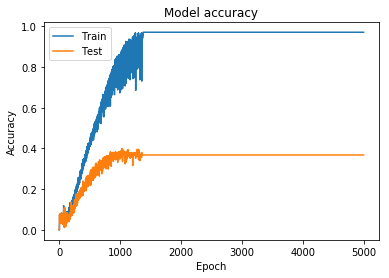

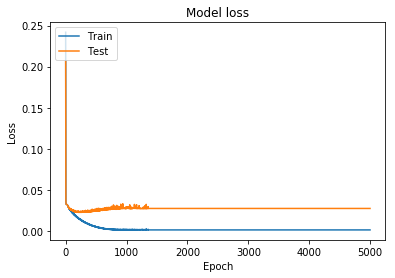

In [11]:
#  build RNN model
model = Sequential()

# RNN cell
INPUT_SIZE = 512

model.add(LSTM(
    units =112,
    batch_input_shape=( BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    #input_dim=INPUT_SIZE,
    #input_length=TIME_STEPS,
    #output_dim=CELL_SIZE,
    #return_sequences=True,
    #stateful=True 
    unroll=True
))

# output layer
#model.add(Flatten())
model.add((Dense(OUTPUT_SIZE)))  #TimeDistributed
model.add(Activation('hard_sigmoid'))
#model.add(Dropout(rate = 0.2)) 

# # optimizer
#
# optimizer

rmsprop = RMSprop(lr=LR, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(optimizer=rmsprop,
              loss='mse',
              metrics=['accuracy'])

# # training
#

# for step in range(51):
#     # data shape = (batch_num, steps, inputs/outputs)
#     X_batch = X_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :, :]
#     Y_batch = y_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :]
#     cost = model.train_on_batch(X_batch, Y_batch)
#     BATCH_INDEX += BATCH_SIZE
#     BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

#     if step % 50 == 0:
#         print('Next_Train----------: step = ', step)
#         train_cost, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=False)
#         print('train_cost: ', train_cost, 'train_accuracy: ', train_accuracy)
#         cost, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=False)
#         print('test cost: ', cost, 'test accuracy: ', accuracy)
        
       

print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=5000, shuffle=True, batch_size=250, verbose=1)

# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[1].output])
# layer_output1 = get_3rd_layer_output([X_train])[0]

# print(layer_output1)


In [4]:
X_train[0:250,].shape

(250, 10, 512)

In [5]:
x_pred = model.predict(X_train[0:750,], batch_size=250)
print('prediction of the model', x_pred)
print('prediction size', x_pred.size)

# x_mask = x_pred.reshape(1000,512)
# plt.imshow(abs(x_mask[:, : int(512 / 2 + 1)].T), aspect = "auto", cmap=plt.cm.afmhot, origin = "lower")
# plt.title("Predicted_Training_Mask", fontsize = 20)
# plt.show()

prediction of the model [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00458685 0.         0.56271106 ... 1.         0.6162192  0.        ]
 ...
 [0.         0.         0.         ... 0.79527366 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.8343643  0.         0.        ]]
prediction size 384000


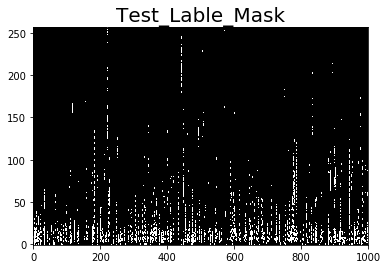

In [6]:
y_mask = y_train[0:1000].reshape(1000,512)
plt.imshow(abs(y_mask[:, : int(512 / 2 + 1)].T), aspect = "auto", cmap=plt.cm.afmhot, origin = "lower")
plt.title("Test_Lable_Mask", fontsize = 20)
plt.show()

prediction of the model [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00458685 0.         0.56271106 ... 1.         0.6162192  0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09173006 0.8229221  ... 1.         0.81086195 0.08965638]
 [0.06306592 0.         0.21919796 ... 0.0924736  0.19526193 0.        ]]
prediction size 512000


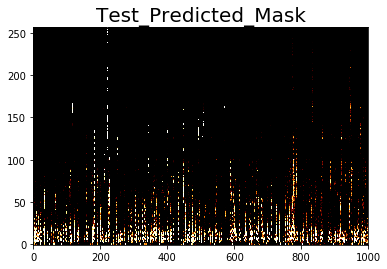

In [7]:
x_pred = model.predict(X_train[0:1000], batch_size=250)
print('prediction of the model', x_pred)
print('prediction size', x_pred.size)

x_mask = x_pred.reshape(1000,512)
plt.imshow(abs(x_mask[:, : int(512 / 2 + 1)].T), aspect = "auto", cmap=plt.cm.afmhot, origin = "lower")
plt.title("Test_Predicted_Mask", fontsize = 20)
plt.show()

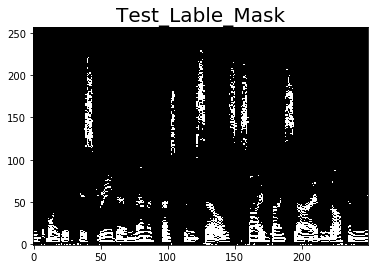

In [8]:
#clear_spec_input_250.txt
#clear_mask_generated_from_threshold_250.txt

y_c = np.loadtxt("clear_mask_generated_from_threshold_250.txt")

y_c = y_c.reshape(250,1024)
plt.imshow(abs(y_c[:, : int(512 / 2 + 1)].T), aspect = "auto", cmap=plt.cm.afmhot, origin = "lower")
plt.title("Test_Lable_Mask", fontsize = 20)
plt.show()

In [9]:
x_c = np.loadtxt("clear_spec_input_250.txt")
x_c.shape

(250, 1024)

In [10]:
x_c = np.loadtxt("clear_spec_input_250.txt")
x_c = x_c.reshape(-1, 10, 512)
x_c = model.predict(x_c, batch_size=250)
print('prediction of the model', x_c)
print('prediction size', x_c.size)

x_c = x_c.reshape(250,1024)
plt.imshow(abs(x_c[:, : int(512 / 2 + 1)].T), aspect = "auto", cmap=plt.cm.afmhot, origin = "lower")
plt.title("Test_Predicted_Mask_for_checking", fontsize = 20)
plt.show()

InvalidArgumentError: Incompatible shapes: [50,112] vs. [250,112]
	 [[Node: lstm_1/add_6 = Add[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:GPU:0"](lstm_1/BiasAdd_3, lstm_1/MatMul_7)]]
	 [[Node: activation_1/clip_by_value/_51 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_733_activation_1/clip_by_value", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/3000
750/750 [==============================] - 1s 1ms/step - loss: 0.2343 - acc: 0.0000e+00 - val_loss: 0.1471 - val_acc: 0.0000e+00
Epoch 2/3000
750/750 [==============================] - 0s 94us/step - loss: 0.0914 - acc: 0.0000e+00 - val_loss: 0.0374 - val_acc: 0.0880
Epoch 3/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0350 - acc: 0.0853 - val_loss: 0.0332 - val_acc: 0.0120
Epoch 4/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0328 - acc: 0.0360 - val_loss: 0.0326 - val_acc: 0.0680
Epoch 5/3000
750/750 [==============================] - 0s 97us/step - loss: 0.0325 - acc: 0.0747 - val_loss: 0.0325 - val_acc: 0.0720
Epoch 6/3000
750/750 [==============================] - 0s 93us/step - loss: 0.0325 - acc: 0.0573 - val_loss: 0.0323 - val_acc: 0.0040
Epoch 7/3000
750/750 [==============================] - 0s 91us/step - loss: 0.0324 - acc: 0.0240 - va

750/750 [==============================] - 0s 88us/step - loss: 0.0258 - acc: 0.1053 - val_loss: 0.0262 - val_acc: 0.0200
Epoch 61/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0246 - acc: 0.0827 - val_loss: 0.0253 - val_acc: 0.0440
Epoch 62/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0243 - acc: 0.0760 - val_loss: 0.0259 - val_acc: 0.0640
Epoch 63/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0245 - acc: 0.0827 - val_loss: 0.0252 - val_acc: 0.0880
Epoch 64/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0244 - acc: 0.0933 - val_loss: 0.0262 - val_acc: 0.0520
Epoch 65/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0240 - acc: 0.0800 - val_loss: 0.0249 - val_acc: 0.0880
Epoch 66/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0239 - acc: 0.0813 - val_loss: 0.0272 - val_acc: 0.0720
Epoch 67/3000
750/750 [==============================] - 0s 87

750/750 [==============================] - 0s 90us/step - loss: 0.0189 - acc: 0.1280 - val_loss: 0.0242 - val_acc: 0.0920
Epoch 121/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0191 - acc: 0.1240 - val_loss: 0.0231 - val_acc: 0.0840
Epoch 122/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0187 - acc: 0.1213 - val_loss: 0.0233 - val_acc: 0.0880
Epoch 123/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0186 - acc: 0.1280 - val_loss: 0.0233 - val_acc: 0.0800
Epoch 124/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0190 - acc: 0.1360 - val_loss: 0.0244 - val_acc: 0.0720
Epoch 125/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0191 - acc: 0.1027 - val_loss: 0.0231 - val_acc: 0.1120
Epoch 126/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0183 - acc: 0.1293 - val_loss: 0.0235 - val_acc: 0.0880
Epoch 127/3000
750/750 [==============================] 

Epoch 180/3000
750/750 [==============================] - 0s 93us/step - loss: 0.0134 - acc: 0.1693 - val_loss: 0.0234 - val_acc: 0.0920
Epoch 181/3000
750/750 [==============================] - 0s 91us/step - loss: 0.0148 - acc: 0.1680 - val_loss: 0.0236 - val_acc: 0.1120
Epoch 182/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0138 - acc: 0.1587 - val_loss: 0.0233 - val_acc: 0.1040
Epoch 183/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0132 - acc: 0.1493 - val_loss: 0.0228 - val_acc: 0.1320
Epoch 184/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0130 - acc: 0.1613 - val_loss: 0.0229 - val_acc: 0.1000
Epoch 185/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0129 - acc: 0.1560 - val_loss: 0.0230 - val_acc: 0.1000
Epoch 186/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0130 - acc: 0.1560 - val_loss: 0.0232 - val_acc: 0.1160
Epoch 187/3000
750/750 [=================

Epoch 240/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0095 - acc: 0.2587 - val_loss: 0.0239 - val_acc: 0.1760
Epoch 241/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0094 - acc: 0.2547 - val_loss: 0.0240 - val_acc: 0.1440
Epoch 242/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0095 - acc: 0.2387 - val_loss: 0.0235 - val_acc: 0.2040
Epoch 243/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0091 - acc: 0.2520 - val_loss: 0.0237 - val_acc: 0.1840
Epoch 244/3000
750/750 [==============================] - 0s 103us/step - loss: 0.0091 - acc: 0.2813 - val_loss: 0.0246 - val_acc: 0.1680
Epoch 245/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0098 - acc: 0.2693 - val_loss: 0.0234 - val_acc: 0.2080
Epoch 246/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0088 - acc: 0.2773 - val_loss: 0.0235 - val_acc: 0.2080
Epoch 247/3000
750/750 [================

Epoch 300/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0063 - acc: 0.3773 - val_loss: 0.0249 - val_acc: 0.2320
Epoch 301/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0057 - acc: 0.3653 - val_loss: 0.0244 - val_acc: 0.2360
Epoch 302/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0055 - acc: 0.3533 - val_loss: 0.0248 - val_acc: 0.2040
Epoch 303/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0055 - acc: 0.3587 - val_loss: 0.0246 - val_acc: 0.2160
Epoch 304/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0058 - acc: 0.3360 - val_loss: 0.0253 - val_acc: 0.2080
Epoch 305/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0060 - acc: 0.3733 - val_loss: 0.0252 - val_acc: 0.2800
Epoch 306/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0064 - acc: 0.3853 - val_loss: 0.0252 - val_acc: 0.2440
Epoch 307/3000
750/750 [=================

Epoch 360/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0034 - acc: 0.5213 - val_loss: 0.0256 - val_acc: 0.2520
Epoch 361/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0033 - acc: 0.5227 - val_loss: 0.0256 - val_acc: 0.2520
Epoch 362/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0035 - acc: 0.4840 - val_loss: 0.0261 - val_acc: 0.2400
Epoch 363/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0037 - acc: 0.4893 - val_loss: 0.0255 - val_acc: 0.2840
Epoch 364/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0039 - acc: 0.4733 - val_loss: 0.0261 - val_acc: 0.2560
Epoch 365/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0034 - acc: 0.4947 - val_loss: 0.0257 - val_acc: 0.2360
Epoch 366/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0033 - acc: 0.5173 - val_loss: 0.0256 - val_acc: 0.2480
Epoch 367/3000
750/750 [=================

Epoch 420/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0030 - acc: 0.5760 - val_loss: 0.0264 - val_acc: 0.2880
Epoch 421/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0022 - acc: 0.6453 - val_loss: 0.0265 - val_acc: 0.2680
Epoch 422/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0022 - acc: 0.6640 - val_loss: 0.0265 - val_acc: 0.2760
Epoch 423/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0021 - acc: 0.6480 - val_loss: 0.0265 - val_acc: 0.2680
Epoch 424/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0021 - acc: 0.6680 - val_loss: 0.0267 - val_acc: 0.2680
Epoch 425/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0022 - acc: 0.6600 - val_loss: 0.0263 - val_acc: 0.3040
Epoch 426/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0023 - acc: 0.6133 - val_loss: 0.0273 - val_acc: 0.2680
Epoch 427/3000
750/750 [=================

Epoch 480/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0018 - acc: 0.7787 - val_loss: 0.0270 - val_acc: 0.3040
Epoch 481/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0018 - acc: 0.7787 - val_loss: 0.0270 - val_acc: 0.3120
Epoch 482/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0018 - acc: 0.7933 - val_loss: 0.0270 - val_acc: 0.3040
Epoch 483/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0018 - acc: 0.7907 - val_loss: 0.0270 - val_acc: 0.3040
Epoch 484/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0018 - acc: 0.7827 - val_loss: 0.0270 - val_acc: 0.3120
Epoch 485/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0018 - acc: 0.7760 - val_loss: 0.0272 - val_acc: 0.3160
Epoch 486/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0018 - acc: 0.7667 - val_loss: 0.0276 - val_acc: 0.2920
Epoch 487/3000
750/750 [=================

Epoch 540/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0016 - acc: 0.8627 - val_loss: 0.0272 - val_acc: 0.3240
Epoch 541/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0016 - acc: 0.8587 - val_loss: 0.0272 - val_acc: 0.3200
Epoch 542/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0016 - acc: 0.8720 - val_loss: 0.0271 - val_acc: 0.3080
Epoch 543/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0016 - acc: 0.8800 - val_loss: 0.0272 - val_acc: 0.3200
Epoch 544/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0016 - acc: 0.8747 - val_loss: 0.0272 - val_acc: 0.3160
Epoch 545/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0016 - acc: 0.8853 - val_loss: 0.0272 - val_acc: 0.3160
Epoch 546/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0016 - acc: 0.8733 - val_loss: 0.0271 - val_acc: 0.3280
Epoch 547/3000
750/750 [=================

Epoch 600/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0016 - acc: 0.9253 - val_loss: 0.0273 - val_acc: 0.3120
Epoch 601/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0016 - acc: 0.9280 - val_loss: 0.0273 - val_acc: 0.3200
Epoch 602/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0016 - acc: 0.9307 - val_loss: 0.0272 - val_acc: 0.3120
Epoch 603/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0016 - acc: 0.9307 - val_loss: 0.0273 - val_acc: 0.3080
Epoch 604/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0016 - acc: 0.9347 - val_loss: 0.0273 - val_acc: 0.3240
Epoch 605/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0016 - acc: 0.9320 - val_loss: 0.0273 - val_acc: 0.3200
Epoch 606/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0016 - acc: 0.9453 - val_loss: 0.0273 - val_acc: 0.3120
Epoch 607/3000
750/750 [=================

Epoch 660/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0016 - acc: 0.9360 - val_loss: 0.0272 - val_acc: 0.3080
Epoch 661/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0016 - acc: 0.9373 - val_loss: 0.0272 - val_acc: 0.3080
Epoch 662/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0016 - acc: 0.9440 - val_loss: 0.0272 - val_acc: 0.3120
Epoch 663/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0016 - acc: 0.9467 - val_loss: 0.0272 - val_acc: 0.3080
Epoch 664/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0016 - acc: 0.9493 - val_loss: 0.0274 - val_acc: 0.3280
Epoch 665/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0019 - acc: 0.8280 - val_loss: 0.0285 - val_acc: 0.2600
Epoch 666/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0024 - acc: 0.6693 - val_loss: 0.0274 - val_acc: 0.3400
Epoch 667/3000
750/750 [=================

Epoch 720/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9440 - val_loss: 0.0273 - val_acc: 0.3120
Epoch 721/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9467 - val_loss: 0.0273 - val_acc: 0.3160
Epoch 722/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9480 - val_loss: 0.0273 - val_acc: 0.3160
Epoch 723/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9507 - val_loss: 0.0273 - val_acc: 0.3240
Epoch 724/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9573 - val_loss: 0.0273 - val_acc: 0.3240
Epoch 725/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9587 - val_loss: 0.0273 - val_acc: 0.3240
Epoch 726/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9667 - val_loss: 0.0273 - val_acc: 0.3240
Epoch 727/3000
750/750 [=================

Epoch 780/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9800 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 781/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 782/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 783/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 784/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 785/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 786/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 787/3000
750/750 [=================

Epoch 840/3000
750/750 [==============================] - 0s 94us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 841/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 842/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 843/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 844/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 845/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 846/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 847/3000
750/750 [=================

Epoch 900/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 901/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 902/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 903/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 904/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 905/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 906/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 907/3000
750/750 [=================

Epoch 960/3000
750/750 [==============================] - 0s 98us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 961/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 962/3000
750/750 [==============================] - 0s 96us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 963/3000
750/750 [==============================] - 0s 95us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 964/3000
750/750 [==============================] - 0s 95us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 965/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 966/3000
750/750 [==============================] - 0s 94us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 967/3000
750/750 [=================

750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1020/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1021/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1022/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1023/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1024/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1025/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1026/3000
750/750 [=========================

750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1079/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1080/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1081/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1082/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1083/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1084/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1085/3000
750/750 [=========================

750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1138/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1139/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1140/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1141/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1142/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1143/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1144/3000
750/750 [=========================

750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1197/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1198/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1199/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1200/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1201/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1202/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1203/3000
750/750 [=========================

750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1256/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1257/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1258/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1259/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1260/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1261/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1262/3000
750/750 [=========================

750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1315/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1316/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1317/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1318/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1319/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1320/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1321/3000
750/750 [=========================

750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1374/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1375/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1376/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1377/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1378/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1379/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1380/3000
750/750 [=========================

750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1433/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1434/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1435/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1436/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1437/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1438/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1439/3000
750/750 [=========================

750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1492/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1493/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1494/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1495/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1496/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1497/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1498/3000
750/750 [=========================

750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1551/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1552/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1553/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1554/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1555/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1556/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1557/3000
750/750 [=========================

750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1610/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1611/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1612/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1613/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1614/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1615/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1616/3000
750/750 [=========================

750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1669/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1670/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1671/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1672/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1673/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1674/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1675/3000
750/750 [=========================

750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1728/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1729/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1730/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1731/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1732/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1733/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1734/3000
750/750 [=========================

750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1787/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1788/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1789/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1790/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1791/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1792/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1793/3000
750/750 [=========================

750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1846/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1847/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1848/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1849/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1850/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1851/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1852/3000
750/750 [=========================

750/750 [==============================] - 0s 96us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1905/3000
750/750 [==============================] - 0s 98us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1906/3000
750/750 [==============================] - 0s 98us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1907/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1908/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1909/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1910/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1911/3000
750/750 [=========================

750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1964/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1965/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1966/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1967/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1968/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1969/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 1970/3000
750/750 [=========================

750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2023/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2024/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2025/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2026/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2027/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2028/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2029/3000
750/750 [=========================

750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2082/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2083/3000
750/750 [==============================] - 0s 85us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2084/3000
750/750 [==============================] - 0s 94us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2085/3000
750/750 [==============================] - 0s 95us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2086/3000
750/750 [==============================] - 0s 97us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2087/3000
750/750 [==============================] - 0s 94us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2088/3000
750/750 [=========================

750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2141/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2142/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2143/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2144/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2145/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2146/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2147/3000
750/750 [=========================

750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2200/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2201/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2202/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2203/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2204/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2205/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2206/3000
750/750 [=========================

750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2259/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2260/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2261/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2262/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2263/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2264/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2265/3000
750/750 [=========================

750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2318/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2319/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2320/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2321/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2322/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2323/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2324/3000
750/750 [=========================

750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2377/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2378/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2379/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2380/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2381/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2382/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2383/3000
750/750 [=========================

750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2436/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2437/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2438/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2439/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2440/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2441/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2442/3000
750/750 [=========================

750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2495/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2496/3000
750/750 [==============================] - 0s 91us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2497/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2498/3000
750/750 [==============================] - 0s 91us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2499/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2500/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2501/3000
750/750 [=========================

750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2554/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2555/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2556/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2557/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2558/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2559/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2560/3000
750/750 [=========================

750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2613/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2614/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2615/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2616/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2617/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2618/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2619/3000
750/750 [=========================

750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2672/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2673/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2674/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2675/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2676/3000
750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2677/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2678/3000
750/750 [=========================

750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2731/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2732/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2733/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2734/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2735/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2736/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2737/3000
750/750 [=========================

750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2790/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2791/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2792/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2793/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2794/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2795/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2796/3000
750/750 [=========================

750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2849/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2850/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2851/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2852/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2853/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2854/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2855/3000
750/750 [=========================

750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2908/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2909/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2910/3000
750/750 [==============================] - 0s 87us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2911/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2912/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2913/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2914/3000
750/750 [=========================

750/750 [==============================] - 0s 86us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2967/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2968/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2969/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2970/3000
750/750 [==============================] - 0s 90us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2971/3000
750/750 [==============================] - 0s 89us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2972/3000
750/750 [==============================] - 0s 88us/step - loss: 0.0015 - acc: 0.9813 - val_loss: 0.0271 - val_acc: 0.3440
Epoch 2973/3000
750/750 [=========================

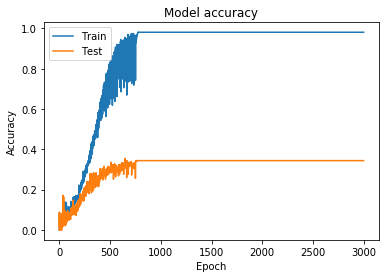

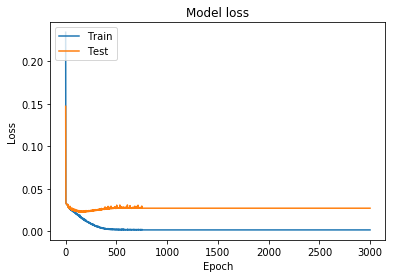

In [12]:
#  build RNN model
model = Sequential()

# RNN cell


model.add(LSTM(
    units =224,
    batch_input_shape=( BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    #input_dim=INPUT_SIZE,
    #input_length=TIME_STEPS,
    #output_dim=CELL_SIZE,
    #return_sequences=True,
    #stateful=True 
    unroll=True
))

# output layer
#model.add(Flatten())
model.add((Dense(OUTPUT_SIZE)))  #TimeDistributed
model.add(Activation('hard_sigmoid'))
#model.add(Dropout(rate = 0.2)) 

# # optimizer
#
# optimizer

rmsprop = RMSprop(lr=LR, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(optimizer=rmsprop,
              loss='mse',
              metrics=['accuracy'])

# # training
#

# for step in range(51):
#     # data shape = (batch_num, steps, inputs/outputs)
#     X_batch = X_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :, :]
#     Y_batch = y_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :]
#     cost = model.train_on_batch(X_batch, Y_batch)
#     BATCH_INDEX += BATCH_SIZE
#     BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

#     if step % 50 == 0:
#         print('Next_Train----------: step = ', step)
#         train_cost, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=False)
#         print('train_cost: ', train_cost, 'train_accuracy: ', train_accuracy)
#         cost, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=False)
#         print('test cost: ', cost, 'test accuracy: ', accuracy)
        
       

print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=3000, shuffle=True, batch_size=250, verbose=1)

# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[1].output])
# layer_output1 = get_3rd_layer_output([X_train])[0]

# print(layer_output1)


Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/1000
750/750 [==============================] - 1s 2ms/step - loss: 0.2221 - acc: 0.0000e+00 - val_loss: 0.0804 - val_acc: 0.0000e+00
Epoch 2/1000
750/750 [==============================] - 0s 137us/step - loss: 0.0506 - acc: 0.0347 - val_loss: 0.0331 - val_acc: 0.0640
Epoch 3/1000
750/750 [==============================] - 0s 128us/step - loss: 0.0328 - acc: 0.0453 - val_loss: 0.0328 - val_acc: 0.0000e+00
Epoch 4/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0326 - acc: 0.0400 - val_loss: 0.0326 - val_acc: 0.0000e+00
Epoch 5/1000
750/750 [==============================] - 0s 126us/step - loss: 0.0326 - acc: 0.0213 - val_loss: 0.0325 - val_acc: 0.0560
Epoch 6/1000
750/750 [==============================] - 0s 126us/step - loss: 0.0324 - acc: 0.0587 - val_loss: 0.0324 - val_acc: 0.0440
Epoch 7/1000
750/750 [==============================] - 0s 127us/step - loss: 0.0321 - acc: 0

750/750 [==============================] - 0s 142us/step - loss: 0.0237 - acc: 0.0493 - val_loss: 0.0244 - val_acc: 0.0680
Epoch 61/1000
750/750 [==============================] - 0s 138us/step - loss: 0.0231 - acc: 0.0867 - val_loss: 0.0251 - val_acc: 0.0880
Epoch 62/1000
750/750 [==============================] - 0s 137us/step - loss: 0.0239 - acc: 0.0773 - val_loss: 0.0250 - val_acc: 0.0600
Epoch 63/1000
750/750 [==============================] - 0s 127us/step - loss: 0.0233 - acc: 0.1067 - val_loss: 0.0245 - val_acc: 0.0600
Epoch 64/1000
750/750 [==============================] - 0s 119us/step - loss: 0.0229 - acc: 0.0560 - val_loss: 0.0241 - val_acc: 0.0720
Epoch 65/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0224 - acc: 0.0627 - val_loss: 0.0240 - val_acc: 0.0920
Epoch 66/1000
750/750 [==============================] - 0s 136us/step - loss: 0.0232 - acc: 0.1133 - val_loss: 0.0270 - val_acc: 0.0800
Epoch 67/1000
750/750 [==============================] 

Epoch 120/1000
750/750 [==============================] - 0s 119us/step - loss: 0.0166 - acc: 0.1707 - val_loss: 0.0230 - val_acc: 0.1040
Epoch 121/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0170 - acc: 0.1493 - val_loss: 0.0224 - val_acc: 0.1560
Epoch 122/1000
750/750 [==============================] - 0s 123us/step - loss: 0.0163 - acc: 0.1547 - val_loss: 0.0224 - val_acc: 0.1480
Epoch 123/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0164 - acc: 0.1613 - val_loss: 0.0240 - val_acc: 0.1200
Epoch 124/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0175 - acc: 0.1733 - val_loss: 0.0224 - val_acc: 0.1320
Epoch 125/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0161 - acc: 0.1720 - val_loss: 0.0224 - val_acc: 0.1280
Epoch 126/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0156 - acc: 0.1720 - val_loss: 0.0223 - val_acc: 0.1200
Epoch 127/1000
750/750 [==========

750/750 [==============================] - 0s 122us/step - loss: 0.0100 - acc: 0.2253 - val_loss: 0.0230 - val_acc: 0.1720
Epoch 180/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0102 - acc: 0.2573 - val_loss: 0.0234 - val_acc: 0.1560
Epoch 181/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0102 - acc: 0.2440 - val_loss: 0.0260 - val_acc: 0.2200
Epoch 182/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0113 - acc: 0.2387 - val_loss: 0.0232 - val_acc: 0.1880
Epoch 183/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0095 - acc: 0.2600 - val_loss: 0.0227 - val_acc: 0.1600
Epoch 184/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0093 - acc: 0.2693 - val_loss: 0.0235 - val_acc: 0.1560
Epoch 185/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0096 - acc: 0.2267 - val_loss: 0.0229 - val_acc: 0.2040
Epoch 186/1000
750/750 [=========================

750/750 [==============================] - 0s 126us/step - loss: 0.0055 - acc: 0.3720 - val_loss: 0.0249 - val_acc: 0.2240
Epoch 239/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0054 - acc: 0.3827 - val_loss: 0.0241 - val_acc: 0.2320
Epoch 240/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0054 - acc: 0.3867 - val_loss: 0.0261 - val_acc: 0.2480
Epoch 241/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0056 - acc: 0.3907 - val_loss: 0.0245 - val_acc: 0.2400
Epoch 242/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0047 - acc: 0.4000 - val_loss: 0.0244 - val_acc: 0.2160
Epoch 243/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0046 - acc: 0.4147 - val_loss: 0.0243 - val_acc: 0.2360
Epoch 244/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0048 - acc: 0.4093 - val_loss: 0.0259 - val_acc: 0.2160
Epoch 245/1000
750/750 [=========================

750/750 [==============================] - 0s 125us/step - loss: 0.0027 - acc: 0.5627 - val_loss: 0.0258 - val_acc: 0.2760
Epoch 298/1000
750/750 [==============================] - 0s 120us/step - loss: 0.0022 - acc: 0.6093 - val_loss: 0.0257 - val_acc: 0.2520
Epoch 299/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0021 - acc: 0.6160 - val_loss: 0.0256 - val_acc: 0.2920
Epoch 300/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0021 - acc: 0.6147 - val_loss: 0.0263 - val_acc: 0.2120
Epoch 301/1000
750/750 [==============================] - 0s 127us/step - loss: 0.0023 - acc: 0.5747 - val_loss: 0.0256 - val_acc: 0.2960
Epoch 302/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0022 - acc: 0.5907 - val_loss: 0.0261 - val_acc: 0.2840
Epoch 303/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0022 - acc: 0.5747 - val_loss: 0.0262 - val_acc: 0.2520
Epoch 304/1000
750/750 [=========================

750/750 [==============================] - 0s 123us/step - loss: 0.0015 - acc: 0.8147 - val_loss: 0.0263 - val_acc: 0.3040
Epoch 357/1000
750/750 [==============================] - 0s 120us/step - loss: 0.0015 - acc: 0.8200 - val_loss: 0.0263 - val_acc: 0.3280
Epoch 358/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0015 - acc: 0.8053 - val_loss: 0.0266 - val_acc: 0.3000
Epoch 359/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0016 - acc: 0.7760 - val_loss: 0.0260 - val_acc: 0.3360
Epoch 360/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0017 - acc: 0.7467 - val_loss: 0.0280 - val_acc: 0.2760
Epoch 361/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0024 - acc: 0.6400 - val_loss: 0.0268 - val_acc: 0.2920
Epoch 362/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0020 - acc: 0.6827 - val_loss: 0.0266 - val_acc: 0.3160
Epoch 363/1000
750/750 [=========================

750/750 [==============================] - 0s 127us/step - loss: 0.0015 - acc: 0.9067 - val_loss: 0.0267 - val_acc: 0.3160
Epoch 416/1000
750/750 [==============================] - 0s 123us/step - loss: 0.0015 - acc: 0.9160 - val_loss: 0.0267 - val_acc: 0.3120
Epoch 417/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0015 - acc: 0.9040 - val_loss: 0.0269 - val_acc: 0.3000
Epoch 418/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0015 - acc: 0.8773 - val_loss: 0.0267 - val_acc: 0.3400
Epoch 419/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0015 - acc: 0.8693 - val_loss: 0.0268 - val_acc: 0.3520
Epoch 420/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0015 - acc: 0.9053 - val_loss: 0.0267 - val_acc: 0.3120
Epoch 421/1000
750/750 [==============================] - 0s 126us/step - loss: 0.0015 - acc: 0.9160 - val_loss: 0.0267 - val_acc: 0.3160
Epoch 422/1000
750/750 [=========================

750/750 [==============================] - 0s 125us/step - loss: 0.0014 - acc: 0.9480 - val_loss: 0.0265 - val_acc: 0.3240
Epoch 475/1000
750/750 [==============================] - 0s 126us/step - loss: 0.0014 - acc: 0.9480 - val_loss: 0.0265 - val_acc: 0.3280
Epoch 476/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0014 - acc: 0.9560 - val_loss: 0.0265 - val_acc: 0.3240
Epoch 477/1000
750/750 [==============================] - 0s 123us/step - loss: 0.0014 - acc: 0.9547 - val_loss: 0.0265 - val_acc: 0.3280
Epoch 478/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0014 - acc: 0.9640 - val_loss: 0.0265 - val_acc: 0.3240
Epoch 479/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0014 - acc: 0.9533 - val_loss: 0.0266 - val_acc: 0.3240
Epoch 480/1000
750/750 [==============================] - 0s 123us/step - loss: 0.0015 - acc: 0.9480 - val_loss: 0.0265 - val_acc: 0.3280
Epoch 481/1000
750/750 [=========================

750/750 [==============================] - 0s 122us/step - loss: 0.0014 - acc: 0.9307 - val_loss: 0.0270 - val_acc: 0.3480
Epoch 534/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0025 - acc: 0.7213 - val_loss: 0.0266 - val_acc: 0.3000
Epoch 535/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0016 - acc: 0.8387 - val_loss: 0.0270 - val_acc: 0.3200
Epoch 536/1000
750/750 [==============================] - 0s 123us/step - loss: 0.0015 - acc: 0.9253 - val_loss: 0.0269 - val_acc: 0.3280
Epoch 537/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0014 - acc: 0.9333 - val_loss: 0.0269 - val_acc: 0.3400
Epoch 538/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0014 - acc: 0.9387 - val_loss: 0.0269 - val_acc: 0.3400
Epoch 539/1000
750/750 [==============================] - 0s 126us/step - loss: 0.0014 - acc: 0.9413 - val_loss: 0.0269 - val_acc: 0.3360
Epoch 540/1000
750/750 [=========================

750/750 [==============================] - 0s 126us/step - loss: 0.0014 - acc: 0.9493 - val_loss: 0.0267 - val_acc: 0.3400
Epoch 593/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0014 - acc: 0.9480 - val_loss: 0.0267 - val_acc: 0.3440
Epoch 594/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0014 - acc: 0.9507 - val_loss: 0.0266 - val_acc: 0.3440
Epoch 595/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0014 - acc: 0.9520 - val_loss: 0.0267 - val_acc: 0.3400
Epoch 596/1000
750/750 [==============================] - 0s 123us/step - loss: 0.0014 - acc: 0.9560 - val_loss: 0.0267 - val_acc: 0.3400
Epoch 597/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0014 - acc: 0.9600 - val_loss: 0.0267 - val_acc: 0.3440
Epoch 598/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0014 - acc: 0.9560 - val_loss: 0.0266 - val_acc: 0.3400
Epoch 599/1000
750/750 [=========================

750/750 [==============================] - 0s 126us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 652/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 653/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 654/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 655/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 656/1000
750/750 [==============================] - 0s 123us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 657/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 658/1000
750/750 [=========================

750/750 [==============================] - 0s 126us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 711/1000
750/750 [==============================] - 0s 123us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 712/1000
750/750 [==============================] - 0s 125us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 713/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 714/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 715/1000
750/750 [==============================] - 0s 126us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 716/1000
750/750 [==============================] - 0s 124us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 717/1000
750/750 [=========================

750/750 [==============================] - 0s 126us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 770/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 771/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 772/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 773/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 774/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 775/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 776/1000
750/750 [=========================

750/750 [==============================] - 0s 124us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 829/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 830/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 831/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 832/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 833/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 834/1000
750/750 [==============================] - 0s 123us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 835/1000
750/750 [=========================

750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 888/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 889/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 890/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 891/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 892/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 893/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 894/1000
750/750 [=========================

750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 947/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 948/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 949/1000
750/750 [==============================] - 0s 122us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 950/1000
750/750 [==============================] - 0s 121us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 951/1000
750/750 [==============================] - 0s 128us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 952/1000
750/750 [==============================] - 0s 126us/step - loss: 0.0013 - acc: 0.9787 - val_loss: 0.0265 - val_acc: 0.3560
Epoch 953/1000
750/750 [=========================

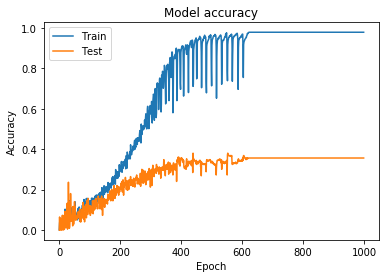

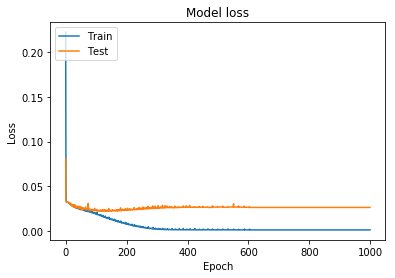

In [14]:
#  build RNN model
model = Sequential()

# RNN cell


model.add(LSTM(
    units =336,
    batch_input_shape=( BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    #input_dim=INPUT_SIZE,
    #input_length=TIME_STEPS,
    #output_dim=CELL_SIZE,
    #return_sequences=True,
    #stateful=True 
    unroll=True
))

# output layer
#model.add(Flatten())
model.add((Dense(OUTPUT_SIZE)))  #TimeDistributed
model.add(Activation('hard_sigmoid'))
#model.add(Dropout(rate = 0.2)) 

# # optimizer
#
# optimizer

rmsprop = RMSprop(lr=LR, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(optimizer=rmsprop,
              loss='mse',
              metrics=['accuracy'])

# # training
#

# for step in range(51):
#     # data shape = (batch_num, steps, inputs/outputs)
#     X_batch = X_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :, :]
#     Y_batch = y_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :]
#     cost = model.train_on_batch(X_batch, Y_batch)
#     BATCH_INDEX += BATCH_SIZE
#     BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

#     if step % 50 == 0:
#         print('Next_Train----------: step = ', step)
#         train_cost, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=False)
#         print('train_cost: ', train_cost, 'train_accuracy: ', train_accuracy)
#         cost, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=False)
#         print('test cost: ', cost, 'test accuracy: ', accuracy)
        
       

print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000, shuffle=True, batch_size=250, verbose=1)

# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[1].output])
# layer_output1 = get_3rd_layer_output([X_train])[0]

# print(layer_output1)


Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/1000
750/750 [==============================] - 1s 2ms/step - loss: 0.2086 - acc: 0.0200 - val_loss: 0.0485 - val_acc: 0.0880
Epoch 2/1000
750/750 [==============================] - 0s 159us/step - loss: 0.0387 - acc: 0.0600 - val_loss: 0.0333 - val_acc: 0.0000e+00
Epoch 3/1000
750/750 [==============================] - 0s 156us/step - loss: 0.0329 - acc: 0.0240 - val_loss: 0.0328 - val_acc: 0.0920
Epoch 4/1000
750/750 [==============================] - 0s 148us/step - loss: 0.0326 - acc: 0.0280 - val_loss: 0.0326 - val_acc: 0.0120
Epoch 5/1000
750/750 [==============================] - 0s 153us/step - loss: 0.0325 - acc: 0.0107 - val_loss: 0.0326 - val_acc: 0.0320
Epoch 6/1000
750/750 [==============================] - 0s 156us/step - loss: 0.0324 - acc: 0.0360 - val_loss: 0.0325 - val_acc: 0.0320
Epoch 7/1000
750/750 [==============================] - 0s 148us/step - loss: 0.0325 - acc: 0.0227 - val_

750/750 [==============================] - 0s 145us/step - loss: 0.0222 - acc: 0.1173 - val_loss: 0.0239 - val_acc: 0.0640
Epoch 61/1000
750/750 [==============================] - 0s 144us/step - loss: 0.0224 - acc: 0.1213 - val_loss: 0.0256 - val_acc: 0.0400
Epoch 62/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0228 - acc: 0.1280 - val_loss: 0.0236 - val_acc: 0.1560
Epoch 63/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0221 - acc: 0.1507 - val_loss: 0.0238 - val_acc: 0.0960
Epoch 64/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0219 - acc: 0.1373 - val_loss: 0.0238 - val_acc: 0.1080
Epoch 65/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0221 - acc: 0.1053 - val_loss: 0.0254 - val_acc: 0.0840
Epoch 66/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0231 - acc: 0.1213 - val_loss: 0.0244 - val_acc: 0.1120
Epoch 67/1000
750/750 [==============================] 

Epoch 120/1000
750/750 [==============================] - 0s 159us/step - loss: 0.0149 - acc: 0.2000 - val_loss: 0.0226 - val_acc: 0.1680
Epoch 121/1000
750/750 [==============================] - 0s 151us/step - loss: 0.0141 - acc: 0.2067 - val_loss: 0.0232 - val_acc: 0.1400
Epoch 122/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0143 - acc: 0.1747 - val_loss: 0.0229 - val_acc: 0.1640
Epoch 123/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0142 - acc: 0.2240 - val_loss: 0.0233 - val_acc: 0.1400
Epoch 124/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0139 - acc: 0.2040 - val_loss: 0.0233 - val_acc: 0.1720
Epoch 125/1000
750/750 [==============================] - 0s 147us/step - loss: 0.0149 - acc: 0.2147 - val_loss: 0.0232 - val_acc: 0.1400
Epoch 126/1000
750/750 [==============================] - 0s 167us/step - loss: 0.0141 - acc: 0.1787 - val_loss: 0.0227 - val_acc: 0.1640
Epoch 127/1000
750/750 [==========

750/750 [==============================] - 0s 149us/step - loss: 0.0063 - acc: 0.3427 - val_loss: 0.0246 - val_acc: 0.2360
Epoch 180/1000
750/750 [==============================] - 0s 147us/step - loss: 0.0059 - acc: 0.3440 - val_loss: 0.0243 - val_acc: 0.2000
Epoch 181/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0056 - acc: 0.3387 - val_loss: 0.0252 - val_acc: 0.2120
Epoch 182/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0065 - acc: 0.3827 - val_loss: 0.0244 - val_acc: 0.2360
Epoch 183/1000
750/750 [==============================] - 0s 148us/step - loss: 0.0069 - acc: 0.3653 - val_loss: 0.0257 - val_acc: 0.1880
Epoch 184/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0058 - acc: 0.3520 - val_loss: 0.0243 - val_acc: 0.2000
Epoch 185/1000
750/750 [==============================] - 0s 170us/step - loss: 0.0059 - acc: 0.3453 - val_loss: 0.0244 - val_acc: 0.2240
Epoch 186/1000
750/750 [=========================

750/750 [==============================] - 0s 145us/step - loss: 0.0033 - acc: 0.5227 - val_loss: 0.0280 - val_acc: 0.2160
Epoch 239/1000
750/750 [==============================] - 0s 154us/step - loss: 0.0029 - acc: 0.5200 - val_loss: 0.0261 - val_acc: 0.2680
Epoch 240/1000
750/750 [==============================] - 0s 161us/step - loss: 0.0019 - acc: 0.6267 - val_loss: 0.0259 - val_acc: 0.2600
Epoch 241/1000
750/750 [==============================] - 0s 147us/step - loss: 0.0018 - acc: 0.6347 - val_loss: 0.0259 - val_acc: 0.2720
Epoch 242/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0018 - acc: 0.6440 - val_loss: 0.0263 - val_acc: 0.2640
Epoch 243/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0019 - acc: 0.6587 - val_loss: 0.0264 - val_acc: 0.2840
Epoch 244/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0022 - acc: 0.5707 - val_loss: 0.0263 - val_acc: 0.2840
Epoch 245/1000
750/750 [=========================

750/750 [==============================] - 0s 150us/step - loss: 0.0020 - acc: 0.7347 - val_loss: 0.0263 - val_acc: 0.2640
Epoch 298/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0022 - acc: 0.6853 - val_loss: 0.0267 - val_acc: 0.2920
Epoch 299/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0014 - acc: 0.8413 - val_loss: 0.0267 - val_acc: 0.2880
Epoch 300/1000
750/750 [==============================] - 0s 150us/step - loss: 0.0014 - acc: 0.8493 - val_loss: 0.0267 - val_acc: 0.3200
Epoch 301/1000
750/750 [==============================] - 0s 153us/step - loss: 0.0014 - acc: 0.8627 - val_loss: 0.0268 - val_acc: 0.2960
Epoch 302/1000
750/750 [==============================] - 0s 149us/step - loss: 0.0014 - acc: 0.8733 - val_loss: 0.0268 - val_acc: 0.2840
Epoch 303/1000
750/750 [==============================] - 0s 150us/step - loss: 0.0014 - acc: 0.8653 - val_loss: 0.0268 - val_acc: 0.3120
Epoch 304/1000
750/750 [=========================

750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9467 - val_loss: 0.0269 - val_acc: 0.3040
Epoch 357/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9467 - val_loss: 0.0271 - val_acc: 0.3080
Epoch 358/1000
750/750 [==============================] - 0s 168us/step - loss: 0.0015 - acc: 0.8813 - val_loss: 0.0265 - val_acc: 0.2920
Epoch 359/1000
750/750 [==============================] - 0s 164us/step - loss: 0.0028 - acc: 0.6373 - val_loss: 0.0276 - val_acc: 0.3240
Epoch 360/1000
750/750 [==============================] - 0s 155us/step - loss: 0.0016 - acc: 0.8120 - val_loss: 0.0268 - val_acc: 0.3240
Epoch 361/1000
750/750 [==============================] - 0s 153us/step - loss: 0.0013 - acc: 0.8960 - val_loss: 0.0266 - val_acc: 0.3160
Epoch 362/1000
750/750 [==============================] - 0s 169us/step - loss: 0.0013 - acc: 0.9107 - val_loss: 0.0267 - val_acc: 0.3200
Epoch 363/1000
750/750 [=========================

750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9520 - val_loss: 0.0269 - val_acc: 0.3120
Epoch 416/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9467 - val_loss: 0.0269 - val_acc: 0.3120
Epoch 417/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9560 - val_loss: 0.0269 - val_acc: 0.3160
Epoch 418/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9533 - val_loss: 0.0269 - val_acc: 0.3160
Epoch 419/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9613 - val_loss: 0.0269 - val_acc: 0.3160
Epoch 420/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9600 - val_loss: 0.0269 - val_acc: 0.3120
Epoch 421/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9627 - val_loss: 0.0269 - val_acc: 0.3120
Epoch 422/1000
750/750 [=========================

750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 475/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 476/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 477/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 478/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 479/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 480/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 481/1000
750/750 [=========================

750/750 [==============================] - 0s 148us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 534/1000
750/750 [==============================] - 0s 148us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 535/1000
750/750 [==============================] - 0s 147us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 536/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 537/1000
750/750 [==============================] - 0s 150us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 538/1000
750/750 [==============================] - 0s 157us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 539/1000
750/750 [==============================] - 0s 149us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 540/1000
750/750 [=========================

750/750 [==============================] - 0s 147us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 593/1000
750/750 [==============================] - 0s 147us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 594/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 595/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 596/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 597/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 598/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 599/1000
750/750 [=========================

750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 652/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 653/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 654/1000
750/750 [==============================] - 0s 151us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 655/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 656/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 657/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 658/1000
750/750 [=========================

750/750 [==============================] - 0s 149us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 711/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 712/1000
750/750 [==============================] - 0s 147us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 713/1000
750/750 [==============================] - 0s 147us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 714/1000
750/750 [==============================] - 0s 144us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 715/1000
750/750 [==============================] - 0s 148us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 716/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 717/1000
750/750 [=========================

750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 770/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 771/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 772/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 773/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 774/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 775/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 776/1000
750/750 [=========================

750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 829/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 830/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 831/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 832/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 833/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 834/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 835/1000
750/750 [=========================

750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 888/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 889/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 890/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 891/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 892/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 893/1000
750/750 [==============================] - 0s 145us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 894/1000
750/750 [=========================

750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 947/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 948/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 949/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 950/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 951/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 952/1000
750/750 [==============================] - 0s 146us/step - loss: 0.0013 - acc: 0.9813 - val_loss: 0.0270 - val_acc: 0.3160
Epoch 953/1000
750/750 [=========================

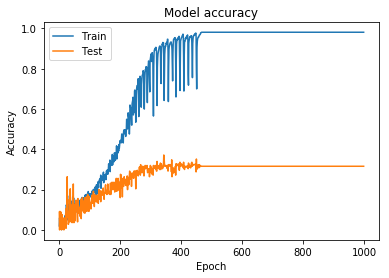

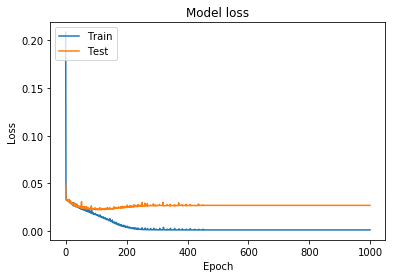

In [15]:
#  build RNN model
model = Sequential()

# RNN cell


model.add(LSTM(
    units =448,
    batch_input_shape=( BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    #input_dim=INPUT_SIZE,
    #input_length=TIME_STEPS,
    #output_dim=CELL_SIZE,
    #return_sequences=True,
    #stateful=True 
    unroll=True
))

# output layer
#model.add(Flatten())
model.add((Dense(OUTPUT_SIZE)))  #TimeDistributed
model.add(Activation('hard_sigmoid'))
#model.add(Dropout(rate = 0.2)) 

# # optimizer
#
# optimizer

rmsprop = RMSprop(lr=LR, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(optimizer=rmsprop,
              loss='mse',
              metrics=['accuracy'])

# # training
#

# for step in range(51):
#     # data shape = (batch_num, steps, inputs/outputs)
#     X_batch = X_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :, :]
#     Y_batch = y_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :]
#     cost = model.train_on_batch(X_batch, Y_batch)
#     BATCH_INDEX += BATCH_SIZE
#     BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

#     if step % 50 == 0:
#         print('Next_Train----------: step = ', step)
#         train_cost, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=False)
#         print('train_cost: ', train_cost, 'train_accuracy: ', train_accuracy)
#         cost, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=False)
#         print('test cost: ', cost, 'test accuracy: ', accuracy)
        
       

print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000, shuffle=True, batch_size=250, verbose=1)

# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[1].output])
# layer_output1 = get_3rd_layer_output([X_train])[0]

# print(layer_output1)


Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/600
750/750 [==============================] - 2s 2ms/step - loss: 0.1955 - acc: 0.0040 - val_loss: 0.0381 - val_acc: 0.0040
Epoch 2/600
750/750 [==============================] - 0s 217us/step - loss: 0.0350 - acc: 0.0293 - val_loss: 0.0331 - val_acc: 0.0880
Epoch 3/600
750/750 [==============================] - 0s 219us/step - loss: 0.0329 - acc: 0.0467 - val_loss: 0.0328 - val_acc: 0.0040
Epoch 4/600
750/750 [==============================] - 0s 217us/step - loss: 0.0327 - acc: 0.0293 - val_loss: 0.0329 - val_acc: 0.0040
Epoch 5/600
750/750 [==============================] - 0s 220us/step - loss: 0.0332 - acc: 0.0507 - val_loss: 0.0326 - val_acc: 0.0680
Epoch 6/600
750/750 [==============================] - 0s 213us/step - loss: 0.0324 - acc: 0.0533 - val_loss: 0.0324 - val_acc: 0.0360
Epoch 7/600
750/750 [==============================] - 0s 219us/step - loss: 0.0324 - acc: 0.0640 - val_loss: 0.032

Epoch 61/600
750/750 [==============================] - 0s 210us/step - loss: 0.0217 - acc: 0.1200 - val_loss: 0.0235 - val_acc: 0.1360
Epoch 62/600
750/750 [==============================] - 0s 210us/step - loss: 0.0208 - acc: 0.1440 - val_loss: 0.0232 - val_acc: 0.1120
Epoch 63/600
750/750 [==============================] - 0s 209us/step - loss: 0.0200 - acc: 0.1533 - val_loss: 0.0236 - val_acc: 0.1560
Epoch 64/600
750/750 [==============================] - 0s 208us/step - loss: 0.0204 - acc: 0.1560 - val_loss: 0.0238 - val_acc: 0.1240
Epoch 65/600
750/750 [==============================] - 0s 207us/step - loss: 0.0212 - acc: 0.1600 - val_loss: 0.0246 - val_acc: 0.0720
Epoch 66/600
750/750 [==============================] - 0s 210us/step - loss: 0.0213 - acc: 0.1373 - val_loss: 0.0239 - val_acc: 0.1240
Epoch 67/600
750/750 [==============================] - 0s 207us/step - loss: 0.0216 - acc: 0.1813 - val_loss: 0.0244 - val_acc: 0.0840
Epoch 68/600
750/750 [==========================

750/750 [==============================] - 0s 212us/step - loss: 0.0101 - acc: 0.2827 - val_loss: 0.0231 - val_acc: 0.1760
Epoch 122/600
750/750 [==============================] - 0s 210us/step - loss: 0.0098 - acc: 0.2760 - val_loss: 0.0242 - val_acc: 0.1880
Epoch 123/600
750/750 [==============================] - 0s 210us/step - loss: 0.0103 - acc: 0.2480 - val_loss: 0.0237 - val_acc: 0.1840
Epoch 124/600
750/750 [==============================] - 0s 210us/step - loss: 0.0101 - acc: 0.2707 - val_loss: 0.0238 - val_acc: 0.1600
Epoch 125/600
750/750 [==============================] - 0s 209us/step - loss: 0.0099 - acc: 0.2627 - val_loss: 0.0246 - val_acc: 0.1680
Epoch 126/600
750/750 [==============================] - 0s 210us/step - loss: 0.0119 - acc: 0.2840 - val_loss: 0.0247 - val_acc: 0.1840
Epoch 127/600
750/750 [==============================] - 0s 209us/step - loss: 0.0097 - acc: 0.2747 - val_loss: 0.0233 - val_acc: 0.1880
Epoch 128/600
750/750 [==============================] 

Epoch 181/600
750/750 [==============================] - 0s 221us/step - loss: 0.0030 - acc: 0.4920 - val_loss: 0.0262 - val_acc: 0.2440
Epoch 182/600
750/750 [==============================] - 0s 216us/step - loss: 0.0044 - acc: 0.4760 - val_loss: 0.0303 - val_acc: 0.2600
Epoch 183/600
750/750 [==============================] - 0s 222us/step - loss: 0.0048 - acc: 0.4760 - val_loss: 0.0254 - val_acc: 0.2360
Epoch 184/600
750/750 [==============================] - 0s 224us/step - loss: 0.0026 - acc: 0.5053 - val_loss: 0.0253 - val_acc: 0.2560
Epoch 185/600
750/750 [==============================] - 0s 223us/step - loss: 0.0024 - acc: 0.5347 - val_loss: 0.0256 - val_acc: 0.2360
Epoch 186/600
750/750 [==============================] - 0s 223us/step - loss: 0.0024 - acc: 0.5320 - val_loss: 0.0258 - val_acc: 0.2360
Epoch 187/600
750/750 [==============================] - 0s 222us/step - loss: 0.0026 - acc: 0.4907 - val_loss: 0.0261 - val_acc: 0.2560
Epoch 188/600
750/750 [==================

Epoch 241/600
750/750 [==============================] - 0s 211us/step - loss: 0.0014 - acc: 0.8067 - val_loss: 0.0267 - val_acc: 0.3160
Epoch 242/600
750/750 [==============================] - 0s 210us/step - loss: 0.0013 - acc: 0.8173 - val_loss: 0.0269 - val_acc: 0.3280
Epoch 243/600
750/750 [==============================] - 0s 210us/step - loss: 0.0013 - acc: 0.8707 - val_loss: 0.0270 - val_acc: 0.2960
Epoch 244/600
750/750 [==============================] - 0s 209us/step - loss: 0.0014 - acc: 0.8280 - val_loss: 0.0276 - val_acc: 0.2520
Epoch 245/600
750/750 [==============================] - 0s 210us/step - loss: 0.0035 - acc: 0.5640 - val_loss: 0.0300 - val_acc: 0.3280
Epoch 246/600
750/750 [==============================] - 0s 210us/step - loss: 0.0025 - acc: 0.6547 - val_loss: 0.0269 - val_acc: 0.2920
Epoch 247/600
750/750 [==============================] - 0s 210us/step - loss: 0.0013 - acc: 0.7867 - val_loss: 0.0270 - val_acc: 0.2760
Epoch 248/600
750/750 [==================

Epoch 301/600
750/750 [==============================] - 0s 210us/step - loss: 0.0013 - acc: 0.8747 - val_loss: 0.0282 - val_acc: 0.3240
Epoch 302/600
750/750 [==============================] - 0s 210us/step - loss: 0.0029 - acc: 0.6587 - val_loss: 0.0279 - val_acc: 0.3360
Epoch 303/600
750/750 [==============================] - 0s 208us/step - loss: 0.0018 - acc: 0.7467 - val_loss: 0.0273 - val_acc: 0.3480
Epoch 304/600
750/750 [==============================] - 0s 209us/step - loss: 0.0012 - acc: 0.8840 - val_loss: 0.0272 - val_acc: 0.3480
Epoch 305/600
750/750 [==============================] - 0s 210us/step - loss: 0.0012 - acc: 0.9133 - val_loss: 0.0272 - val_acc: 0.3440
Epoch 306/600
750/750 [==============================] - 0s 210us/step - loss: 0.0012 - acc: 0.9200 - val_loss: 0.0272 - val_acc: 0.3560
Epoch 307/600
750/750 [==============================] - 0s 210us/step - loss: 0.0012 - acc: 0.9213 - val_loss: 0.0273 - val_acc: 0.3440
Epoch 308/600
750/750 [==================

Epoch 361/600
750/750 [==============================] - 0s 209us/step - loss: 0.0010 - acc: 0.9627 - val_loss: 0.0272 - val_acc: 0.3560
Epoch 362/600
750/750 [==============================] - 0s 210us/step - loss: 0.0010 - acc: 0.9653 - val_loss: 0.0273 - val_acc: 0.3640
Epoch 363/600
750/750 [==============================] - 0s 210us/step - loss: 0.0010 - acc: 0.9667 - val_loss: 0.0273 - val_acc: 0.3480
Epoch 364/600
750/750 [==============================] - 0s 209us/step - loss: 0.0010 - acc: 0.9667 - val_loss: 0.0272 - val_acc: 0.3480
Epoch 365/600
750/750 [==============================] - 0s 210us/step - loss: 0.0010 - acc: 0.9667 - val_loss: 0.0273 - val_acc: 0.3400
Epoch 366/600
750/750 [==============================] - 0s 209us/step - loss: 0.0010 - acc: 0.9653 - val_loss: 0.0273 - val_acc: 0.3480
Epoch 367/600
750/750 [==============================] - 0s 210us/step - loss: 0.0010 - acc: 0.9640 - val_loss: 0.0273 - val_acc: 0.3440
Epoch 368/600
750/750 [==================

750/750 [==============================] - 0s 218us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 420/600
750/750 [==============================] - 0s 210us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 421/600
750/750 [==============================] - 0s 209us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 422/600
750/750 [==============================] - 0s 210us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 423/600
750/750 [==============================] - 0s 209us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 424/600
750/750 [==============================] - 0s 210us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 425/600
750/750 [==============================] - 0s 209us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 426/600
750/750 [====

750/750 [==============================] - 0s 211us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 478/600
750/750 [==============================] - 0s 213us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 479/600
750/750 [==============================] - 0s 212us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 480/600
750/750 [==============================] - 0s 208us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 481/600
750/750 [==============================] - 0s 215us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 482/600
750/750 [==============================] - 0s 215us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 483/600
750/750 [==============================] - 0s 217us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 484/600
750/750 [====

750/750 [==============================] - 0s 212us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 536/600
750/750 [==============================] - 0s 211us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 537/600
750/750 [==============================] - 0s 209us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 538/600
750/750 [==============================] - 0s 210us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 539/600
750/750 [==============================] - 0s 210us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 540/600
750/750 [==============================] - 0s 210us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 541/600
750/750 [==============================] - 0s 209us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 542/600
750/750 [====

750/750 [==============================] - 0s 210us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 594/600
750/750 [==============================] - 0s 209us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 595/600
750/750 [==============================] - 0s 210us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 596/600
750/750 [==============================] - 0s 210us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 597/600
750/750 [==============================] - 0s 211us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 598/600
750/750 [==============================] - 0s 209us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 599/600
750/750 [==============================] - 0s 210us/step - loss: 9.5833e-04 - acc: 0.9800 - val_loss: 0.0279 - val_acc: 0.3280
Epoch 600/600
750/750 [====

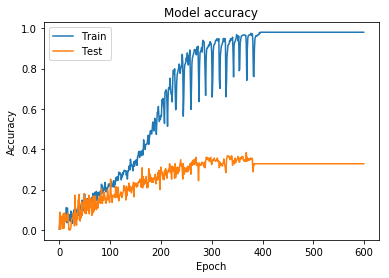

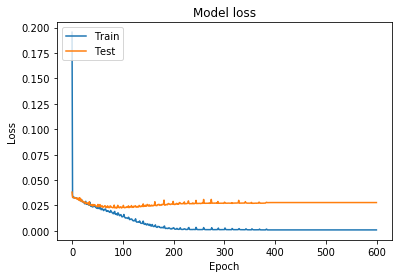

In [16]:
#  build RNN model
model = Sequential()

# RNN cell


model.add(LSTM(
    units =560,
    batch_input_shape=( BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    #input_dim=INPUT_SIZE,
    #input_length=TIME_STEPS,
    #output_dim=CELL_SIZE,
    #return_sequences=True,
    #stateful=True 
    unroll=True
))

# output layer
#model.add(Flatten())
model.add((Dense(OUTPUT_SIZE)))  #TimeDistributed
model.add(Activation('hard_sigmoid'))
#model.add(Dropout(rate = 0.2)) 

# # optimizer
#
# optimizer

rmsprop = RMSprop(lr=LR, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(optimizer=rmsprop,
              loss='mse',
              metrics=['accuracy'])

# # training
#

# for step in range(51):
#     # data shape = (batch_num, steps, inputs/outputs)
#     X_batch = X_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :, :]
#     Y_batch = y_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :]
#     cost = model.train_on_batch(X_batch, Y_batch)
#     BATCH_INDEX += BATCH_SIZE
#     BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

#     if step % 50 == 0:
#         print('Next_Train----------: step = ', step)
#         train_cost, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=False)
#         print('train_cost: ', train_cost, 'train_accuracy: ', train_accuracy)
#         cost, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=False)
#         print('test cost: ', cost, 'test accuracy: ', accuracy)
        
       

print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=600, shuffle=True, batch_size=250, verbose=1)

# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[1].output])
# layer_output1 = get_3rd_layer_output([X_train])[0]

# print(layer_output1)


Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/2000
750/750 [==============================] - 1s 1ms/step - loss: 0.2396 - acc: 0.0000e+00 - val_loss: 0.1901 - val_acc: 0.0000e+00
Epoch 2/2000
750/750 [==============================] - 0s 37us/step - loss: 0.1585 - acc: 0.0000e+00 - val_loss: 0.1065 - val_acc: 0.0000e+00
Epoch 3/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0902 - acc: 0.0000e+00 - val_loss: 0.0657 - val_acc: 0.0000e+00
Epoch 4/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0586 - acc: 0.0000e+00 - val_loss: 0.0477 - val_acc: 0.0000e+00
Epoch 5/2000
750/750 [==============================] - 0s 42us/step - loss: 0.0444 - acc: 0.0013 - val_loss: 0.0393 - val_acc: 0.0040
Epoch 6/2000
750/750 [==============================] - 0s 40us/step - loss: 0.0378 - acc: 0.0093 - val_loss: 0.0354 - val_acc: 0.0240
Epoch 7/2000
750/750 [==============================] - 0s 37us/step - loss: 0.034

750/750 [==============================] - 0s 34us/step - loss: 0.0262 - acc: 0.0680 - val_loss: 0.0275 - val_acc: 0.0280
Epoch 61/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0265 - acc: 0.0333 - val_loss: 0.0268 - val_acc: 0.0400
Epoch 62/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0256 - acc: 0.0547 - val_loss: 0.0267 - val_acc: 0.0320
Epoch 63/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0254 - acc: 0.0467 - val_loss: 0.0267 - val_acc: 0.0400
Epoch 64/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0255 - acc: 0.0600 - val_loss: 0.0270 - val_acc: 0.0360
Epoch 65/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0256 - acc: 0.0587 - val_loss: 0.0267 - val_acc: 0.0400
Epoch 66/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0251 - acc: 0.0467 - val_loss: 0.0266 - val_acc: 0.0320
Epoch 67/2000
750/750 [==============================] - 0s 33

750/750 [==============================] - 0s 33us/step - loss: 0.0198 - acc: 0.1200 - val_loss: 0.0234 - val_acc: 0.0920
Epoch 121/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0203 - acc: 0.0960 - val_loss: 0.0235 - val_acc: 0.0760
Epoch 122/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0202 - acc: 0.1253 - val_loss: 0.0235 - val_acc: 0.0560
Epoch 123/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0196 - acc: 0.1013 - val_loss: 0.0230 - val_acc: 0.0960
Epoch 124/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0197 - acc: 0.0987 - val_loss: 0.0231 - val_acc: 0.1280
Epoch 125/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0195 - acc: 0.1280 - val_loss: 0.0233 - val_acc: 0.1040
Epoch 126/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0198 - acc: 0.1280 - val_loss: 0.0232 - val_acc: 0.0920
Epoch 127/2000
750/750 [==============================] 

Epoch 180/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0149 - acc: 0.1640 - val_loss: 0.0221 - val_acc: 0.1240
Epoch 181/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0152 - acc: 0.1680 - val_loss: 0.0232 - val_acc: 0.1240
Epoch 182/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0153 - acc: 0.1653 - val_loss: 0.0221 - val_acc: 0.1360
Epoch 183/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0148 - acc: 0.1720 - val_loss: 0.0222 - val_acc: 0.1280
Epoch 184/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0147 - acc: 0.1667 - val_loss: 0.0223 - val_acc: 0.1480
Epoch 185/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0151 - acc: 0.1827 - val_loss: 0.0226 - val_acc: 0.1160
Epoch 186/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0147 - acc: 0.1787 - val_loss: 0.0221 - val_acc: 0.1240
Epoch 187/2000
750/750 [=================

Epoch 240/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0118 - acc: 0.2133 - val_loss: 0.0225 - val_acc: 0.1720
Epoch 241/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0128 - acc: 0.2267 - val_loss: 0.0233 - val_acc: 0.1720
Epoch 242/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0117 - acc: 0.2360 - val_loss: 0.0220 - val_acc: 0.1520
Epoch 243/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0114 - acc: 0.2440 - val_loss: 0.0222 - val_acc: 0.1560
Epoch 244/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0114 - acc: 0.2240 - val_loss: 0.0221 - val_acc: 0.1480
Epoch 245/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0113 - acc: 0.2427 - val_loss: 0.0226 - val_acc: 0.1480
Epoch 246/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0114 - acc: 0.2333 - val_loss: 0.0220 - val_acc: 0.1560
Epoch 247/2000
750/750 [=================

Epoch 300/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0090 - acc: 0.2747 - val_loss: 0.0229 - val_acc: 0.1960
Epoch 301/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0091 - acc: 0.2813 - val_loss: 0.0224 - val_acc: 0.2200
Epoch 302/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0091 - acc: 0.2907 - val_loss: 0.0229 - val_acc: 0.2120
Epoch 303/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0094 - acc: 0.3200 - val_loss: 0.0249 - val_acc: 0.2520
Epoch 304/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0098 - acc: 0.3147 - val_loss: 0.0224 - val_acc: 0.2280
Epoch 305/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0092 - acc: 0.3013 - val_loss: 0.0230 - val_acc: 0.2240
Epoch 306/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0088 - acc: 0.2987 - val_loss: 0.0229 - val_acc: 0.2080
Epoch 307/2000
750/750 [=================

Epoch 360/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0076 - acc: 0.3600 - val_loss: 0.0253 - val_acc: 0.2640
Epoch 361/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0074 - acc: 0.3440 - val_loss: 0.0233 - val_acc: 0.2360
Epoch 362/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0073 - acc: 0.3480 - val_loss: 0.0241 - val_acc: 0.2760
Epoch 363/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0072 - acc: 0.3533 - val_loss: 0.0233 - val_acc: 0.2440
Epoch 364/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0071 - acc: 0.3480 - val_loss: 0.0232 - val_acc: 0.2640
Epoch 365/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0071 - acc: 0.3613 - val_loss: 0.0244 - val_acc: 0.2680
Epoch 366/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0075 - acc: 0.3453 - val_loss: 0.0228 - val_acc: 0.2680
Epoch 367/2000
750/750 [=================

Epoch 420/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0060 - acc: 0.4053 - val_loss: 0.0233 - val_acc: 0.3160
Epoch 421/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0061 - acc: 0.4120 - val_loss: 0.0255 - val_acc: 0.3120
Epoch 422/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0061 - acc: 0.4147 - val_loss: 0.0234 - val_acc: 0.3120
Epoch 423/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0057 - acc: 0.3907 - val_loss: 0.0240 - val_acc: 0.2960
Epoch 424/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0057 - acc: 0.3987 - val_loss: 0.0241 - val_acc: 0.3200
Epoch 425/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0056 - acc: 0.3920 - val_loss: 0.0239 - val_acc: 0.2920
Epoch 426/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0056 - acc: 0.4160 - val_loss: 0.0242 - val_acc: 0.3160
Epoch 427/2000
750/750 [=================

Epoch 480/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0046 - acc: 0.4533 - val_loss: 0.0247 - val_acc: 0.3440
Epoch 481/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0046 - acc: 0.4613 - val_loss: 0.0248 - val_acc: 0.3480
Epoch 482/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0044 - acc: 0.4387 - val_loss: 0.0252 - val_acc: 0.3240
Epoch 483/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0046 - acc: 0.4613 - val_loss: 0.0245 - val_acc: 0.3240
Epoch 484/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0047 - acc: 0.4373 - val_loss: 0.0266 - val_acc: 0.3160
Epoch 485/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0049 - acc: 0.4613 - val_loss: 0.0236 - val_acc: 0.3400
Epoch 486/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0047 - acc: 0.4560 - val_loss: 0.0248 - val_acc: 0.3320
Epoch 487/2000
750/750 [=================

Epoch 540/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0035 - acc: 0.5013 - val_loss: 0.0270 - val_acc: 0.3520
Epoch 541/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0036 - acc: 0.5000 - val_loss: 0.0254 - val_acc: 0.3400
Epoch 542/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0037 - acc: 0.4627 - val_loss: 0.0269 - val_acc: 0.3400
Epoch 543/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0038 - acc: 0.4747 - val_loss: 0.0254 - val_acc: 0.3680
Epoch 544/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0036 - acc: 0.5080 - val_loss: 0.0262 - val_acc: 0.3640
Epoch 545/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0037 - acc: 0.5067 - val_loss: 0.0258 - val_acc: 0.3280
Epoch 546/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0038 - acc: 0.4773 - val_loss: 0.0291 - val_acc: 0.3280
Epoch 547/2000
750/750 [=================

Epoch 600/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0029 - acc: 0.5280 - val_loss: 0.0257 - val_acc: 0.3920
Epoch 601/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0030 - acc: 0.5653 - val_loss: 0.0290 - val_acc: 0.3520
Epoch 602/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0033 - acc: 0.5400 - val_loss: 0.0261 - val_acc: 0.3480
Epoch 603/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0029 - acc: 0.5680 - val_loss: 0.0264 - val_acc: 0.3720
Epoch 604/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0029 - acc: 0.5573 - val_loss: 0.0295 - val_acc: 0.3520
Epoch 605/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0031 - acc: 0.5480 - val_loss: 0.0256 - val_acc: 0.3560
Epoch 606/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0030 - acc: 0.5427 - val_loss: 0.0281 - val_acc: 0.3480
Epoch 607/2000
750/750 [=================

Epoch 660/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0025 - acc: 0.5800 - val_loss: 0.0303 - val_acc: 0.3280
Epoch 661/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0030 - acc: 0.5640 - val_loss: 0.0264 - val_acc: 0.3680
Epoch 662/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0023 - acc: 0.5960 - val_loss: 0.0279 - val_acc: 0.3760
Epoch 663/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0022 - acc: 0.6067 - val_loss: 0.0273 - val_acc: 0.3720
Epoch 664/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0022 - acc: 0.6107 - val_loss: 0.0275 - val_acc: 0.3760
Epoch 665/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0024 - acc: 0.6040 - val_loss: 0.0273 - val_acc: 0.3720
Epoch 666/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0026 - acc: 0.6040 - val_loss: 0.0290 - val_acc: 0.3680
Epoch 667/2000
750/750 [=================

Epoch 720/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0022 - acc: 0.6040 - val_loss: 0.0277 - val_acc: 0.3880
Epoch 721/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0021 - acc: 0.6640 - val_loss: 0.0286 - val_acc: 0.3680
Epoch 722/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0019 - acc: 0.6733 - val_loss: 0.0276 - val_acc: 0.4000
Epoch 723/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0019 - acc: 0.6627 - val_loss: 0.0275 - val_acc: 0.3720
Epoch 724/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0020 - acc: 0.6267 - val_loss: 0.0301 - val_acc: 0.3760
Epoch 725/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0020 - acc: 0.6333 - val_loss: 0.0264 - val_acc: 0.3680
Epoch 726/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0020 - acc: 0.6400 - val_loss: 0.0289 - val_acc: 0.3640
Epoch 727/2000
750/750 [=================

Epoch 780/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0016 - acc: 0.6973 - val_loss: 0.0296 - val_acc: 0.3520
Epoch 781/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0016 - acc: 0.6827 - val_loss: 0.0276 - val_acc: 0.4000
Epoch 782/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0017 - acc: 0.7080 - val_loss: 0.0304 - val_acc: 0.3800
Epoch 783/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0017 - acc: 0.6800 - val_loss: 0.0285 - val_acc: 0.3840
Epoch 784/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0018 - acc: 0.6707 - val_loss: 0.0305 - val_acc: 0.3640
Epoch 785/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0016 - acc: 0.7067 - val_loss: 0.0288 - val_acc: 0.3680
Epoch 786/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0016 - acc: 0.7120 - val_loss: 0.0269 - val_acc: 0.3880
Epoch 787/2000
750/750 [=================

Epoch 840/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0015 - acc: 0.7093 - val_loss: 0.0273 - val_acc: 0.3800
Epoch 841/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0016 - acc: 0.7093 - val_loss: 0.0295 - val_acc: 0.3720
Epoch 842/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0015 - acc: 0.7227 - val_loss: 0.0284 - val_acc: 0.4000
Epoch 843/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0014 - acc: 0.7653 - val_loss: 0.0295 - val_acc: 0.3840
Epoch 844/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0014 - acc: 0.7640 - val_loss: 0.0298 - val_acc: 0.3920
Epoch 845/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0015 - acc: 0.7533 - val_loss: 0.0277 - val_acc: 0.3840
Epoch 846/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0016 - acc: 0.7080 - val_loss: 0.0315 - val_acc: 0.3800
Epoch 847/2000
750/750 [=================

Epoch 900/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0015 - acc: 0.7280 - val_loss: 0.0270 - val_acc: 0.4160
Epoch 901/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0013 - acc: 0.7880 - val_loss: 0.0307 - val_acc: 0.4040
Epoch 902/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0013 - acc: 0.7880 - val_loss: 0.0288 - val_acc: 0.3920
Epoch 903/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0013 - acc: 0.7773 - val_loss: 0.0293 - val_acc: 0.4080
Epoch 904/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0013 - acc: 0.8000 - val_loss: 0.0294 - val_acc: 0.3880
Epoch 905/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0016 - acc: 0.7267 - val_loss: 0.0331 - val_acc: 0.3800
Epoch 906/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0017 - acc: 0.7613 - val_loss: 0.0271 - val_acc: 0.4000
Epoch 907/2000
750/750 [=================

Epoch 960/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0013 - acc: 0.7893 - val_loss: 0.0316 - val_acc: 0.4080
Epoch 961/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0015 - acc: 0.7653 - val_loss: 0.0294 - val_acc: 0.3960
Epoch 962/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0013 - acc: 0.7987 - val_loss: 0.0303 - val_acc: 0.4040
Epoch 963/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.8533 - val_loss: 0.0300 - val_acc: 0.3920
Epoch 964/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.8520 - val_loss: 0.0295 - val_acc: 0.4040
Epoch 965/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.8347 - val_loss: 0.0303 - val_acc: 0.4000
Epoch 966/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0011 - acc: 0.8427 - val_loss: 0.0278 - val_acc: 0.4040
Epoch 967/2000
750/750 [=================

750/750 [==============================] - 0s 32us/step - loss: 0.0011 - acc: 0.8773 - val_loss: 0.0290 - val_acc: 0.3840
Epoch 1020/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0011 - acc: 0.8760 - val_loss: 0.0291 - val_acc: 0.3800
Epoch 1021/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0011 - acc: 0.8787 - val_loss: 0.0293 - val_acc: 0.3840
Epoch 1022/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.8733 - val_loss: 0.0293 - val_acc: 0.3840
Epoch 1023/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0011 - acc: 0.8547 - val_loss: 0.0280 - val_acc: 0.4000
Epoch 1024/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0018 - acc: 0.7707 - val_loss: 0.0315 - val_acc: 0.3800
Epoch 1025/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0014 - acc: 0.7853 - val_loss: 0.0285 - val_acc: 0.3800
Epoch 1026/2000
750/750 [=========================

750/750 [==============================] - 0s 32us/step - loss: 0.0011 - acc: 0.8893 - val_loss: 0.0293 - val_acc: 0.3920
Epoch 1079/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.8907 - val_loss: 0.0291 - val_acc: 0.3800
Epoch 1080/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.8947 - val_loss: 0.0297 - val_acc: 0.4000
Epoch 1081/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0013 - acc: 0.8520 - val_loss: 0.0287 - val_acc: 0.3400
Epoch 1082/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0015 - acc: 0.7720 - val_loss: 0.0290 - val_acc: 0.3960
Epoch 1083/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0011 - acc: 0.8733 - val_loss: 0.0305 - val_acc: 0.4000
Epoch 1084/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.8827 - val_loss: 0.0296 - val_acc: 0.4040
Epoch 1085/2000
750/750 [=========================

750/750 [==============================] - 0s 35us/step - loss: 0.0019 - acc: 0.7573 - val_loss: 0.0290 - val_acc: 0.3880
Epoch 1138/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0012 - acc: 0.8373 - val_loss: 0.0294 - val_acc: 0.3960
Epoch 1139/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0011 - acc: 0.9040 - val_loss: 0.0297 - val_acc: 0.3960
Epoch 1140/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.9107 - val_loss: 0.0297 - val_acc: 0.3960
Epoch 1141/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0011 - acc: 0.9120 - val_loss: 0.0297 - val_acc: 0.3960
Epoch 1142/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0011 - acc: 0.9200 - val_loss: 0.0300 - val_acc: 0.3920
Epoch 1143/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0011 - acc: 0.9160 - val_loss: 0.0299 - val_acc: 0.3960
Epoch 1144/2000
750/750 [=========================

750/750 [==============================] - 0s 30us/step - loss: 0.0011 - acc: 0.9320 - val_loss: 0.0290 - val_acc: 0.3880
Epoch 1197/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0011 - acc: 0.9347 - val_loss: 0.0291 - val_acc: 0.3880
Epoch 1198/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0011 - acc: 0.9347 - val_loss: 0.0289 - val_acc: 0.3920
Epoch 1199/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0011 - acc: 0.9373 - val_loss: 0.0297 - val_acc: 0.3920
Epoch 1200/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0020 - acc: 0.7533 - val_loss: 0.0294 - val_acc: 0.3680
Epoch 1201/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0012 - acc: 0.8320 - val_loss: 0.0286 - val_acc: 0.3880
Epoch 1202/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0011 - acc: 0.8867 - val_loss: 0.0290 - val_acc: 0.3960
Epoch 1203/2000
750/750 [=========================

750/750 [==============================] - 0s 32us/step - loss: 0.0011 - acc: 0.9453 - val_loss: 0.0294 - val_acc: 0.3880
Epoch 1256/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0011 - acc: 0.9493 - val_loss: 0.0295 - val_acc: 0.3960
Epoch 1257/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.9453 - val_loss: 0.0296 - val_acc: 0.3840
Epoch 1258/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0017 - acc: 0.8400 - val_loss: 0.0299 - val_acc: 0.3760
Epoch 1259/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0014 - acc: 0.8027 - val_loss: 0.0292 - val_acc: 0.4040
Epoch 1260/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.9147 - val_loss: 0.0290 - val_acc: 0.3960
Epoch 1261/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0011 - acc: 0.9280 - val_loss: 0.0290 - val_acc: 0.3920
Epoch 1262/2000
750/750 [=========================

750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.9360 - val_loss: 0.0288 - val_acc: 0.4120
Epoch 1315/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.9373 - val_loss: 0.0287 - val_acc: 0.4040
Epoch 1316/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0011 - acc: 0.9453 - val_loss: 0.0288 - val_acc: 0.4080
Epoch 1317/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0011 - acc: 0.9413 - val_loss: 0.0287 - val_acc: 0.4040
Epoch 1318/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.9413 - val_loss: 0.0288 - val_acc: 0.3920
Epoch 1319/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.9373 - val_loss: 0.0285 - val_acc: 0.3920
Epoch 1320/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0015 - acc: 0.8213 - val_loss: 0.0319 - val_acc: 0.3840
Epoch 1321/2000
750/750 [=========================

750/750 [==============================] - 0s 34us/step - loss: 0.0011 - acc: 0.9440 - val_loss: 0.0290 - val_acc: 0.3840
Epoch 1374/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.9413 - val_loss: 0.0289 - val_acc: 0.3800
Epoch 1375/2000
750/750 [==============================] - 0s 31us/step - loss: 0.0011 - acc: 0.9453 - val_loss: 0.0290 - val_acc: 0.3800
Epoch 1376/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.9520 - val_loss: 0.0289 - val_acc: 0.3800
Epoch 1377/2000
750/750 [==============================] - 0s 31us/step - loss: 0.0011 - acc: 0.9480 - val_loss: 0.0288 - val_acc: 0.3840
Epoch 1378/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 0.9560 - val_loss: 0.0289 - val_acc: 0.3800
Epoch 1379/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0011 - acc: 0.9347 - val_loss: 0.0306 - val_acc: 0.3960
Epoch 1380/2000
750/750 [=========================

750/750 [==============================] - 0s 35us/step - loss: 0.0010 - acc: 0.9640 - val_loss: 0.0285 - val_acc: 0.3880
Epoch 1433/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9653 - val_loss: 0.0285 - val_acc: 0.3880
Epoch 1434/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0011 - acc: 0.9533 - val_loss: 0.0288 - val_acc: 0.3920
Epoch 1435/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0017 - acc: 0.7907 - val_loss: 0.0262 - val_acc: 0.4200
Epoch 1436/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0015 - acc: 0.8120 - val_loss: 0.0283 - val_acc: 0.3880
Epoch 1437/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0011 - acc: 0.9187 - val_loss: 0.0281 - val_acc: 0.3880
Epoch 1438/2000
750/750 [==============================] - 0s 31us/step - loss: 0.0011 - acc: 0.9267 - val_loss: 0.0282 - val_acc: 0.3920
Epoch 1439/2000
750/750 [=========================

750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1492/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1493/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1494/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1495/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1496/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1497/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1498/2000
750/750 [=========================

750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1551/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1552/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1553/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1554/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1555/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1556/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1557/2000
750/750 [=========================

750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1610/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1611/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1612/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1613/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1614/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1615/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1616/2000
750/750 [=========================

750/750 [==============================] - 0s 39us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1669/2000
750/750 [==============================] - 0s 42us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1670/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1671/2000
750/750 [==============================] - 0s 35us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1672/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1673/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1674/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1675/2000
750/750 [=========================

750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1728/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1729/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1730/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1731/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1732/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1733/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1734/2000
750/750 [=========================

750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1787/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1788/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1789/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1790/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1791/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1792/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1793/2000
750/750 [=========================

750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1846/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1847/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1848/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1849/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1850/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1851/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1852/2000
750/750 [=========================

750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1905/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1906/2000
750/750 [==============================] - 0s 34us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1907/2000
750/750 [==============================] - 0s 31us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1908/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1909/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1910/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1911/2000
750/750 [=========================

750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1964/2000
750/750 [==============================] - 0s 31us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1965/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1966/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1967/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1968/2000
750/750 [==============================] - 0s 32us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1969/2000
750/750 [==============================] - 0s 33us/step - loss: 0.0010 - acc: 0.9747 - val_loss: 0.0281 - val_acc: 0.3800
Epoch 1970/2000
750/750 [=========================

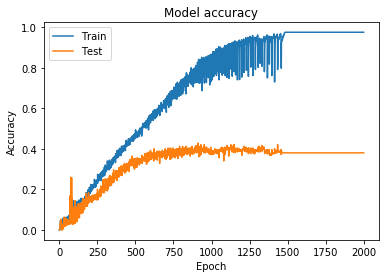

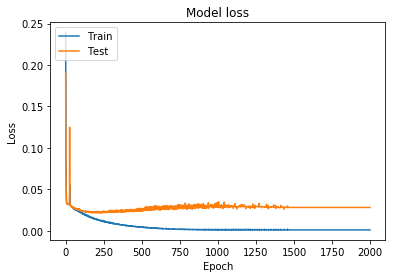

In [18]:
#  build RNN model
model = Sequential()

# RNN cell


model.add(SimpleRNN(
    units =112,
    batch_input_shape=( BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    #input_dim=INPUT_SIZE,
    #input_length=TIME_STEPS,
    #output_dim=CELL_SIZE,
    #return_sequences=True,
    #stateful=True 
    unroll=True
))

# output layer
#model.add(Flatten())
model.add((Dense(OUTPUT_SIZE)))  #TimeDistributed
model.add(Activation('hard_sigmoid'))
#model.add(Dropout(rate = 0.2)) 

# # optimizer
#
# optimizer

rmsprop = RMSprop(lr=LR, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(optimizer=rmsprop,
              loss='mse',
              metrics=['accuracy'])

# # training
#

# for step in range(51):
#     # data shape = (batch_num, steps, inputs/outputs)
#     X_batch = X_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :, :]
#     Y_batch = y_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :]
#     cost = model.train_on_batch(X_batch, Y_batch)
#     BATCH_INDEX += BATCH_SIZE
#     BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

#     if step % 50 == 0:
#         print('Next_Train----------: step = ', step)
#         train_cost, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=False)
#         print('train_cost: ', train_cost, 'train_accuracy: ', train_accuracy)
#         cost, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=False)
#         print('test cost: ', cost, 'test accuracy: ', accuracy)
        
       

print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, shuffle=True, batch_size=250, verbose=1)

# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[1].output])
# layer_output1 = get_3rd_layer_output([X_train])[0]

# print(layer_output1)


Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/2000
750/750 [==============================] - 1s 1ms/step - loss: 0.2199 - acc: 0.0000e+00 - val_loss: 0.1139 - val_acc: 0.0000e+00
Epoch 2/2000
750/750 [==============================] - 0s 43us/step - loss: 0.0822 - acc: 0.0000e+00 - val_loss: 0.0454 - val_acc: 0.0000e+00
Epoch 3/2000
750/750 [==============================] - 0s 40us/step - loss: 0.0404 - acc: 0.0253 - val_loss: 0.0345 - val_acc: 0.0800
Epoch 4/2000
750/750 [==============================] - 0s 41us/step - loss: 0.0337 - acc: 0.0493 - val_loss: 0.0326 - val_acc: 0.0720
Epoch 5/2000
750/750 [==============================] - 0s 39us/step - loss: 0.0325 - acc: 0.0560 - val_loss: 0.0322 - val_acc: 0.0080
Epoch 6/2000
750/750 [==============================] - 0s 42us/step - loss: 0.0322 - acc: 0.0507 - val_loss: 0.0321 - val_acc: 0.0880
Epoch 7/2000
750/750 [==============================] - 0s 45us/step - loss: 0.0322 - acc: 0.0600 

750/750 [==============================] - 0s 38us/step - loss: 0.0235 - acc: 0.0493 - val_loss: 0.0251 - val_acc: 0.0480
Epoch 61/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0244 - acc: 0.0613 - val_loss: 0.0273 - val_acc: 0.1400
Epoch 62/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0246 - acc: 0.1427 - val_loss: 0.0243 - val_acc: 0.0360
Epoch 63/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0229 - acc: 0.0600 - val_loss: 0.0254 - val_acc: 0.0520
Epoch 64/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0226 - acc: 0.0760 - val_loss: 0.0240 - val_acc: 0.0320
Epoch 65/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0225 - acc: 0.0587 - val_loss: 0.0240 - val_acc: 0.0360
Epoch 66/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0219 - acc: 0.0640 - val_loss: 0.0237 - val_acc: 0.0840
Epoch 67/2000
750/750 [==============================] - 0s 38

750/750 [==============================] - 0s 37us/step - loss: 0.0161 - acc: 0.1627 - val_loss: 0.0221 - val_acc: 0.1200
Epoch 121/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0158 - acc: 0.1573 - val_loss: 0.0225 - val_acc: 0.0760
Epoch 122/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0156 - acc: 0.1640 - val_loss: 0.0216 - val_acc: 0.1440
Epoch 123/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0149 - acc: 0.1680 - val_loss: 0.0225 - val_acc: 0.1320
Epoch 124/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0154 - acc: 0.1613 - val_loss: 0.0217 - val_acc: 0.1560
Epoch 125/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0150 - acc: 0.1893 - val_loss: 0.0229 - val_acc: 0.1200
Epoch 126/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0153 - acc: 0.1467 - val_loss: 0.0217 - val_acc: 0.1720
Epoch 127/2000
750/750 [==============================] 

Epoch 180/2000
750/750 [==============================] - 0s 39us/step - loss: 0.0110 - acc: 0.2693 - val_loss: 0.0232 - val_acc: 0.2000
Epoch 181/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0104 - acc: 0.2440 - val_loss: 0.0220 - val_acc: 0.1960
Epoch 182/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0093 - acc: 0.2693 - val_loss: 0.0225 - val_acc: 0.1880
Epoch 183/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0094 - acc: 0.2587 - val_loss: 0.0225 - val_acc: 0.2160
Epoch 184/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0094 - acc: 0.2600 - val_loss: 0.0226 - val_acc: 0.1880
Epoch 185/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0097 - acc: 0.2427 - val_loss: 0.0233 - val_acc: 0.2040
Epoch 186/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0096 - acc: 0.2760 - val_loss: 0.0224 - val_acc: 0.2000
Epoch 187/2000
750/750 [=================

Epoch 240/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0059 - acc: 0.3560 - val_loss: 0.0255 - val_acc: 0.2320
Epoch 241/2000
750/750 [==============================] - 0s 39us/step - loss: 0.0057 - acc: 0.3467 - val_loss: 0.0235 - val_acc: 0.2360
Epoch 242/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0056 - acc: 0.4187 - val_loss: 0.0228 - val_acc: 0.2240
Epoch 243/2000
750/750 [==============================] - 0s 41us/step - loss: 0.0059 - acc: 0.3547 - val_loss: 0.0237 - val_acc: 0.2440
Epoch 244/2000
750/750 [==============================] - 0s 41us/step - loss: 0.0056 - acc: 0.3747 - val_loss: 0.0230 - val_acc: 0.2160
Epoch 245/2000
750/750 [==============================] - 0s 41us/step - loss: 0.0058 - acc: 0.3613 - val_loss: 0.0238 - val_acc: 0.2680
Epoch 246/2000
750/750 [==============================] - 0s 43us/step - loss: 0.0056 - acc: 0.3747 - val_loss: 0.0238 - val_acc: 0.2160
Epoch 247/2000
750/750 [=================

Epoch 300/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0032 - acc: 0.5160 - val_loss: 0.0253 - val_acc: 0.2800
Epoch 301/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0031 - acc: 0.4987 - val_loss: 0.0254 - val_acc: 0.2560
Epoch 302/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0030 - acc: 0.4720 - val_loss: 0.0241 - val_acc: 0.2840
Epoch 303/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0029 - acc: 0.5000 - val_loss: 0.0255 - val_acc: 0.2400
Epoch 304/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0030 - acc: 0.4893 - val_loss: 0.0249 - val_acc: 0.2640
Epoch 305/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0032 - acc: 0.4773 - val_loss: 0.0244 - val_acc: 0.2800
Epoch 306/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0038 - acc: 0.4627 - val_loss: 0.0263 - val_acc: 0.2600
Epoch 307/2000
750/750 [=================

Epoch 360/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0020 - acc: 0.6187 - val_loss: 0.0251 - val_acc: 0.2600
Epoch 361/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0022 - acc: 0.5760 - val_loss: 0.0260 - val_acc: 0.2960
Epoch 362/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0016 - acc: 0.6253 - val_loss: 0.0256 - val_acc: 0.2960
Epoch 363/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0015 - acc: 0.6507 - val_loss: 0.0260 - val_acc: 0.2920
Epoch 364/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0019 - acc: 0.6040 - val_loss: 0.0290 - val_acc: 0.2800
Epoch 365/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0019 - acc: 0.6360 - val_loss: 0.0254 - val_acc: 0.2960
Epoch 366/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0020 - acc: 0.5920 - val_loss: 0.0262 - val_acc: 0.3080
Epoch 367/2000
750/750 [=================

750/750 [==============================] - 0s 39us/step - loss: 0.0016 - acc: 0.6533 - val_loss: 0.0267 - val_acc: 0.3520
Epoch 420/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0013 - acc: 0.7067 - val_loss: 0.0256 - val_acc: 0.2920
Epoch 421/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0011 - acc: 0.7400 - val_loss: 0.0264 - val_acc: 0.2960
Epoch 422/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0011 - acc: 0.7440 - val_loss: 0.0259 - val_acc: 0.2920
Epoch 423/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0011 - acc: 0.7533 - val_loss: 0.0265 - val_acc: 0.3040
Epoch 424/2000
750/750 [==============================] - 0s 36us/step - loss: 0.0012 - acc: 0.7280 - val_loss: 0.0260 - val_acc: 0.2920
Epoch 425/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0015 - acc: 0.6933 - val_loss: 0.0282 - val_acc: 0.2920
Epoch 426/2000
750/750 [==============================] 

750/750 [==============================] - 0s 38us/step - loss: 9.9521e-04 - acc: 0.7987 - val_loss: 0.0285 - val_acc: 0.2880
Epoch 479/2000
750/750 [==============================] - 0s 38us/step - loss: 9.7831e-04 - acc: 0.8067 - val_loss: 0.0291 - val_acc: 0.3040
Epoch 480/2000
750/750 [==============================] - 0s 36us/step - loss: 8.9191e-04 - acc: 0.8333 - val_loss: 0.0289 - val_acc: 0.3160
Epoch 481/2000
750/750 [==============================] - 0s 37us/step - loss: 8.5396e-04 - acc: 0.8600 - val_loss: 0.0285 - val_acc: 0.3040
Epoch 482/2000
750/750 [==============================] - 0s 39us/step - loss: 8.4970e-04 - acc: 0.8613 - val_loss: 0.0285 - val_acc: 0.3120
Epoch 483/2000
750/750 [==============================] - 0s 38us/step - loss: 8.7614e-04 - acc: 0.8267 - val_loss: 0.0280 - val_acc: 0.3240
Epoch 484/2000
750/750 [==============================] - 0s 38us/step - loss: 0.0017 - acc: 0.6800 - val_loss: 0.0270 - val_acc: 0.2760
Epoch 485/2000
750/750 [========

750/750 [==============================] - 0s 40us/step - loss: 8.1505e-04 - acc: 0.9173 - val_loss: 0.0269 - val_acc: 0.3080
Epoch 537/2000
750/750 [==============================] - 0s 38us/step - loss: 8.1491e-04 - acc: 0.9267 - val_loss: 0.0269 - val_acc: 0.3080
Epoch 538/2000
750/750 [==============================] - 0s 39us/step - loss: 8.1582e-04 - acc: 0.9213 - val_loss: 0.0269 - val_acc: 0.3120
Epoch 539/2000
750/750 [==============================] - 0s 40us/step - loss: 8.1471e-04 - acc: 0.9293 - val_loss: 0.0269 - val_acc: 0.3040
Epoch 540/2000
750/750 [==============================] - 0s 38us/step - loss: 8.1510e-04 - acc: 0.9240 - val_loss: 0.0271 - val_acc: 0.3200
Epoch 541/2000
750/750 [==============================] - 0s 39us/step - loss: 8.1607e-04 - acc: 0.9253 - val_loss: 0.0268 - val_acc: 0.3080
Epoch 542/2000
750/750 [==============================] - 0s 39us/step - loss: 8.5814e-04 - acc: 0.8840 - val_loss: 0.0272 - val_acc: 0.3040
Epoch 543/2000
750/750 [====

750/750 [==============================] - 0s 42us/step - loss: 8.1069e-04 - acc: 0.9493 - val_loss: 0.0267 - val_acc: 0.3120
Epoch 595/2000
750/750 [==============================] - 0s 38us/step - loss: 8.1069e-04 - acc: 0.9560 - val_loss: 0.0266 - val_acc: 0.3120
Epoch 596/2000
750/750 [==============================] - 0s 38us/step - loss: 8.1873e-04 - acc: 0.9573 - val_loss: 0.0271 - val_acc: 0.3160
Epoch 597/2000
750/750 [==============================] - 0s 37us/step - loss: 0.0023 - acc: 0.7120 - val_loss: 0.0343 - val_acc: 0.3080
Epoch 598/2000
750/750 [==============================] - 0s 39us/step - loss: 0.0022 - acc: 0.7387 - val_loss: 0.0264 - val_acc: 0.3200
Epoch 599/2000
750/750 [==============================] - 0s 37us/step - loss: 8.9535e-04 - acc: 0.8800 - val_loss: 0.0265 - val_acc: 0.3360
Epoch 600/2000
750/750 [==============================] - 0s 37us/step - loss: 8.3735e-04 - acc: 0.9000 - val_loss: 0.0264 - val_acc: 0.3320
Epoch 601/2000
750/750 [============

750/750 [==============================] - 0s 36us/step - loss: 8.0509e-04 - acc: 0.9467 - val_loss: 0.0262 - val_acc: 0.3280
Epoch 653/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0493e-04 - acc: 0.9453 - val_loss: 0.0262 - val_acc: 0.3280
Epoch 654/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0483e-04 - acc: 0.9600 - val_loss: 0.0262 - val_acc: 0.3280
Epoch 655/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0478e-04 - acc: 0.9560 - val_loss: 0.0262 - val_acc: 0.3280
Epoch 656/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0477e-04 - acc: 0.9587 - val_loss: 0.0262 - val_acc: 0.3280
Epoch 657/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0474e-04 - acc: 0.9560 - val_loss: 0.0262 - val_acc: 0.3280
Epoch 658/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0472e-04 - acc: 0.9693 - val_loss: 0.0262 - val_acc: 0.3280
Epoch 659/2000
750/750 [====

750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 711/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 712/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 713/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 714/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 715/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 716/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 717/2000
750/750 [====

750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 769/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 770/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 771/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 772/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 773/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 774/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 775/2000
750/750 [====

750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 827/2000
750/750 [==============================] - 0s 42us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 828/2000
750/750 [==============================] - 0s 40us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 829/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 830/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 831/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 832/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 833/2000
750/750 [====

750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 885/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 886/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 887/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 888/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 889/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 890/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 891/2000
750/750 [====

750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 943/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 944/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 945/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 946/2000
750/750 [==============================] - 0s 40us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 947/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 948/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 949/2000
750/750 [====

750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1001/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1002/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1003/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1004/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1005/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1006/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1007/2000
750/75

Epoch 1058/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1059/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1060/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1061/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1062/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1063/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1064/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 

750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1116/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1117/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1118/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1119/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1120/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1121/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1122/2000
750/75

Epoch 1173/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1174/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1175/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1176/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1177/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1178/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1179/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 

750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1231/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1232/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1233/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1234/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1235/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1236/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1237/2000
750/75

Epoch 1288/2000
750/750 [==============================] - 0s 35us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1289/2000
750/750 [==============================] - 0s 41us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1290/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1291/2000
750/750 [==============================] - 0s 41us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1292/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1293/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1294/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 

750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1346/2000
750/750 [==============================] - 0s 41us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1347/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1348/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1349/2000
750/750 [==============================] - 0s 40us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1350/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1351/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1352/2000
750/75

Epoch 1403/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1404/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1405/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1406/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1407/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1408/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1409/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 

750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1461/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1462/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1463/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1464/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1465/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1466/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1467/2000
750/75

Epoch 1518/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1519/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1520/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1521/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1522/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1523/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1524/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 

750/750 [==============================] - 0s 43us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1576/2000
750/750 [==============================] - 0s 43us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1577/2000
750/750 [==============================] - 0s 42us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1578/2000
750/750 [==============================] - 0s 40us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1579/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1580/2000
750/750 [==============================] - 0s 43us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1581/2000
750/750 [==============================] - 0s 42us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1582/2000
750/75

Epoch 1633/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1634/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1635/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1636/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1637/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1638/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1639/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 

750/750 [==============================] - 0s 43us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1691/2000
750/750 [==============================] - 0s 45us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1692/2000
750/750 [==============================] - 0s 44us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1693/2000
750/750 [==============================] - 0s 43us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1694/2000
750/750 [==============================] - 0s 40us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1695/2000
750/750 [==============================] - 0s 42us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1696/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1697/2000
750/75

Epoch 1748/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1749/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1750/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1751/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1752/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1753/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1754/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 

750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1806/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1807/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1808/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1809/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1810/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1811/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1812/2000
750/75

Epoch 1863/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1864/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1865/2000
750/750 [==============================] - 0s 40us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1866/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1867/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1868/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1869/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 

750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1921/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1922/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1923/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1924/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1925/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1926/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1927/2000
750/75

Epoch 1978/2000
750/750 [==============================] - 0s 39us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1979/2000
750/750 [==============================] - 0s 37us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1980/2000
750/750 [==============================] - 0s 36us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1981/2000
750/750 [==============================] - 0s 40us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1982/2000
750/750 [==============================] - 0s 38us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1983/2000
750/750 [==============================] - 0s 40us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 1984/2000
750/750 [==============================] - 0s 40us/step - loss: 8.0469e-04 - acc: 0.9867 - val_loss: 0.0264 - val_acc: 0.3160
Epoch 

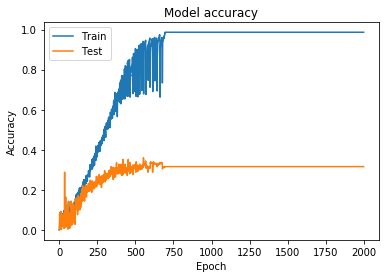

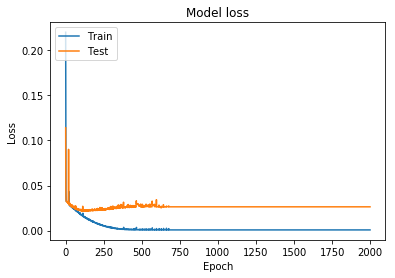

In [19]:
#  build RNN model
model = Sequential()

# RNN cell


model.add(SimpleRNN(
    units =224,
    batch_input_shape=( BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    #input_dim=INPUT_SIZE,
    #input_length=TIME_STEPS,
    #output_dim=CELL_SIZE,
    #return_sequences=True,
    #stateful=True 
    unroll=True
))

# output layer
#model.add(Flatten())
model.add((Dense(OUTPUT_SIZE)))  #TimeDistributed
model.add(Activation('hard_sigmoid'))
#model.add(Dropout(rate = 0.2)) 

# # optimizer
#
# optimizer

rmsprop = RMSprop(lr=LR, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(optimizer=rmsprop,
              loss='mse',
              metrics=['accuracy'])

# # training
#

# for step in range(51):
#     # data shape = (batch_num, steps, inputs/outputs)
#     X_batch = X_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :, :]
#     Y_batch = y_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :]
#     cost = model.train_on_batch(X_batch, Y_batch)
#     BATCH_INDEX += BATCH_SIZE
#     BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

#     if step % 50 == 0:
#         print('Next_Train----------: step = ', step)
#         train_cost, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=False)
#         print('train_cost: ', train_cost, 'train_accuracy: ', train_accuracy)
#         cost, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=False)
#         print('test cost: ', cost, 'test accuracy: ', accuracy)
        
       

print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, shuffle=True, batch_size=250, verbose=1)

# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[1].output])
# layer_output1 = get_3rd_layer_output([X_train])[0]

# print(layer_output1)


Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2095 - acc: 0.0000e+00 - val_loss: 0.0706 - val_acc: 0.0000e+00
Epoch 2/1000
750/750 [==============================] - 0s 50us/step - loss: 0.0503 - acc: 0.0267 - val_loss: 0.0335 - val_acc: 0.0680
Epoch 3/1000
750/750 [==============================] - 0s 55us/step - loss: 0.0329 - acc: 0.0587 - val_loss: 0.0322 - val_acc: 0.0600
Epoch 4/1000
750/750 [==============================] - 0s 53us/step - loss: 0.0323 - acc: 0.0293 - val_loss: 0.0322 - val_acc: 0.0720
Epoch 5/1000
750/750 [==============================] - 0s 51us/step - loss: 0.0322 - acc: 0.0587 - val_loss: 0.0321 - val_acc: 0.0840
Epoch 6/1000
750/750 [==============================] - 0s 53us/step - loss: 0.0322 - acc: 0.0520 - val_loss: 0.0320 - val_acc: 0.0720
Epoch 7/1000
750/750 [==============================] - 0s 54us/step - loss: 0.0320 - acc: 0.0573 - val_lo

750/750 [==============================] - 0s 46us/step - loss: 0.0204 - acc: 0.0800 - val_loss: 0.0251 - val_acc: 0.0360
Epoch 61/1000
750/750 [==============================] - 0s 46us/step - loss: 0.0209 - acc: 0.0960 - val_loss: 0.0233 - val_acc: 0.0960
Epoch 62/1000
750/750 [==============================] - 0s 46us/step - loss: 0.0204 - acc: 0.0653 - val_loss: 0.0240 - val_acc: 0.1040
Epoch 63/1000
750/750 [==============================] - 0s 44us/step - loss: 0.0206 - acc: 0.0800 - val_loss: 0.0236 - val_acc: 0.0720
Epoch 64/1000
750/750 [==============================] - 0s 45us/step - loss: 0.0205 - acc: 0.1040 - val_loss: 0.0234 - val_acc: 0.1280
Epoch 65/1000
750/750 [==============================] - 0s 45us/step - loss: 0.0200 - acc: 0.0973 - val_loss: 0.0235 - val_acc: 0.0480
Epoch 66/1000
750/750 [==============================] - 0s 45us/step - loss: 0.0203 - acc: 0.1067 - val_loss: 0.0259 - val_acc: 0.0440
Epoch 67/1000
750/750 [==============================] - 0s 46

750/750 [==============================] - 0s 46us/step - loss: 0.0115 - acc: 0.2320 - val_loss: 0.0223 - val_acc: 0.1240
Epoch 121/1000
750/750 [==============================] - 0s 46us/step - loss: 0.0114 - acc: 0.1973 - val_loss: 0.0226 - val_acc: 0.1560
Epoch 122/1000
750/750 [==============================] - 0s 46us/step - loss: 0.0113 - acc: 0.2027 - val_loss: 0.0222 - val_acc: 0.1640
Epoch 123/1000
750/750 [==============================] - 0s 46us/step - loss: 0.0110 - acc: 0.2347 - val_loss: 0.0218 - val_acc: 0.1480
Epoch 124/1000
750/750 [==============================] - 0s 47us/step - loss: 0.0111 - acc: 0.2013 - val_loss: 0.0244 - val_acc: 0.1240
Epoch 125/1000
750/750 [==============================] - 0s 47us/step - loss: 0.0118 - acc: 0.1813 - val_loss: 0.0224 - val_acc: 0.1880
Epoch 126/1000
750/750 [==============================] - 0s 46us/step - loss: 0.0119 - acc: 0.2293 - val_loss: 0.0236 - val_acc: 0.1600
Epoch 127/1000
750/750 [==============================] 

Epoch 180/1000
750/750 [==============================] - 0s 46us/step - loss: 0.0054 - acc: 0.4120 - val_loss: 0.0226 - val_acc: 0.2120
Epoch 181/1000
750/750 [==============================] - 0s 48us/step - loss: 0.0057 - acc: 0.3480 - val_loss: 0.0238 - val_acc: 0.2360
Epoch 182/1000
750/750 [==============================] - 0s 48us/step - loss: 0.0057 - acc: 0.3520 - val_loss: 0.0231 - val_acc: 0.2320
Epoch 183/1000
750/750 [==============================] - 0s 47us/step - loss: 0.0058 - acc: 0.3827 - val_loss: 0.0245 - val_acc: 0.2680
Epoch 184/1000
750/750 [==============================] - 0s 48us/step - loss: 0.0054 - acc: 0.3920 - val_loss: 0.0237 - val_acc: 0.2120
Epoch 185/1000
750/750 [==============================] - 0s 47us/step - loss: 0.0051 - acc: 0.3680 - val_loss: 0.0237 - val_acc: 0.2560
Epoch 186/1000
750/750 [==============================] - 0s 47us/step - loss: 0.0050 - acc: 0.3693 - val_loss: 0.0233 - val_acc: 0.2640
Epoch 187/1000
750/750 [=================

Epoch 240/1000
750/750 [==============================] - 0s 50us/step - loss: 0.0024 - acc: 0.5680 - val_loss: 0.0241 - val_acc: 0.2960
Epoch 241/1000
750/750 [==============================] - 0s 49us/step - loss: 0.0029 - acc: 0.5480 - val_loss: 0.0257 - val_acc: 0.2960
Epoch 242/1000
750/750 [==============================] - 0s 50us/step - loss: 0.0029 - acc: 0.4933 - val_loss: 0.0243 - val_acc: 0.2800
Epoch 243/1000
750/750 [==============================] - 0s 47us/step - loss: 0.0021 - acc: 0.5493 - val_loss: 0.0245 - val_acc: 0.2760
Epoch 244/1000
750/750 [==============================] - 0s 50us/step - loss: 0.0021 - acc: 0.5333 - val_loss: 0.0241 - val_acc: 0.3280
Epoch 245/1000
750/750 [==============================] - 0s 49us/step - loss: 0.0020 - acc: 0.5787 - val_loss: 0.0245 - val_acc: 0.2600
Epoch 246/1000
750/750 [==============================] - 0s 46us/step - loss: 0.0024 - acc: 0.5147 - val_loss: 0.0243 - val_acc: 0.2800
Epoch 247/1000
750/750 [=================

Epoch 300/1000
750/750 [==============================] - 0s 50us/step - loss: 0.0011 - acc: 0.7507 - val_loss: 0.0253 - val_acc: 0.3080
Epoch 301/1000
750/750 [==============================] - 0s 48us/step - loss: 0.0018 - acc: 0.6280 - val_loss: 0.0259 - val_acc: 0.3920
Epoch 302/1000
750/750 [==============================] - 0s 48us/step - loss: 0.0020 - acc: 0.6547 - val_loss: 0.0251 - val_acc: 0.3160
Epoch 303/1000
750/750 [==============================] - 0s 48us/step - loss: 0.0014 - acc: 0.6960 - val_loss: 0.0247 - val_acc: 0.3400
Epoch 304/1000
750/750 [==============================] - 0s 51us/step - loss: 0.0010 - acc: 0.7933 - val_loss: 0.0249 - val_acc: 0.3360
Epoch 305/1000
750/750 [==============================] - 0s 47us/step - loss: 9.4372e-04 - acc: 0.8147 - val_loss: 0.0249 - val_acc: 0.3200
Epoch 306/1000
750/750 [==============================] - 0s 48us/step - loss: 9.2500e-04 - acc: 0.8013 - val_loss: 0.0248 - val_acc: 0.3320
Epoch 307/1000
750/750 [=========

Epoch 359/1000
750/750 [==============================] - 0s 48us/step - loss: 0.0020 - acc: 0.6867 - val_loss: 0.0249 - val_acc: 0.3360
Epoch 360/1000
750/750 [==============================] - 0s 48us/step - loss: 0.0010 - acc: 0.8187 - val_loss: 0.0252 - val_acc: 0.3560
Epoch 361/1000
750/750 [==============================] - 0s 47us/step - loss: 8.6939e-04 - acc: 0.8747 - val_loss: 0.0249 - val_acc: 0.3720
Epoch 362/1000
750/750 [==============================] - 0s 48us/step - loss: 8.4059e-04 - acc: 0.8907 - val_loss: 0.0249 - val_acc: 0.3720
Epoch 363/1000
750/750 [==============================] - 0s 47us/step - loss: 8.3382e-04 - acc: 0.8973 - val_loss: 0.0249 - val_acc: 0.3640
Epoch 364/1000
750/750 [==============================] - 0s 48us/step - loss: 8.3154e-04 - acc: 0.8893 - val_loss: 0.0250 - val_acc: 0.3680
Epoch 365/1000
750/750 [==============================] - 0s 49us/step - loss: 8.3021e-04 - acc: 0.8987 - val_loss: 0.0249 - val_acc: 0.3640
Epoch 366/1000
750/75

750/750 [==============================] - 0s 50us/step - loss: 0.0012 - acc: 0.8040 - val_loss: 0.0261 - val_acc: 0.3320
Epoch 418/1000
750/750 [==============================] - 0s 51us/step - loss: 0.0018 - acc: 0.7293 - val_loss: 0.0269 - val_acc: 0.3000
Epoch 419/1000
750/750 [==============================] - 0s 45us/step - loss: 0.0013 - acc: 0.7933 - val_loss: 0.0256 - val_acc: 0.3480
Epoch 420/1000
750/750 [==============================] - 0s 45us/step - loss: 8.8236e-04 - acc: 0.8947 - val_loss: 0.0255 - val_acc: 0.3520
Epoch 421/1000
750/750 [==============================] - 0s 46us/step - loss: 8.3239e-04 - acc: 0.9320 - val_loss: 0.0254 - val_acc: 0.3480
Epoch 422/1000
750/750 [==============================] - 0s 46us/step - loss: 8.2417e-04 - acc: 0.9320 - val_loss: 0.0254 - val_acc: 0.3520
Epoch 423/1000
750/750 [==============================] - 0s 47us/step - loss: 8.2118e-04 - acc: 0.9373 - val_loss: 0.0254 - val_acc: 0.3520
Epoch 424/1000
750/750 [================

750/750 [==============================] - 0s 48us/step - loss: 0.0017 - acc: 0.7440 - val_loss: 0.0260 - val_acc: 0.3560
Epoch 476/1000
750/750 [==============================] - 0s 48us/step - loss: 9.3985e-04 - acc: 0.9120 - val_loss: 0.0255 - val_acc: 0.3680
Epoch 477/1000
750/750 [==============================] - 0s 50us/step - loss: 8.9051e-04 - acc: 0.9280 - val_loss: 0.0256 - val_acc: 0.3600
Epoch 478/1000
750/750 [==============================] - 0s 46us/step - loss: 8.3526e-04 - acc: 0.9120 - val_loss: 0.0256 - val_acc: 0.3760
Epoch 479/1000
750/750 [==============================] - 0s 50us/step - loss: 8.2269e-04 - acc: 0.9373 - val_loss: 0.0254 - val_acc: 0.3600
Epoch 480/1000
750/750 [==============================] - 0s 46us/step - loss: 8.2656e-04 - acc: 0.9440 - val_loss: 0.0258 - val_acc: 0.3680
Epoch 481/1000
750/750 [==============================] - 0s 49us/step - loss: 8.4262e-04 - acc: 0.9387 - val_loss: 0.0260 - val_acc: 0.3560
Epoch 482/1000
750/750 [========

750/750 [==============================] - 0s 50us/step - loss: 7.9694e-04 - acc: 0.9693 - val_loss: 0.0254 - val_acc: 0.3680
Epoch 534/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9690e-04 - acc: 0.9747 - val_loss: 0.0254 - val_acc: 0.3680
Epoch 535/1000
750/750 [==============================] - 0s 50us/step - loss: 7.9690e-04 - acc: 0.9720 - val_loss: 0.0254 - val_acc: 0.3680
Epoch 536/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9688e-04 - acc: 0.9787 - val_loss: 0.0254 - val_acc: 0.3680
Epoch 537/1000
750/750 [==============================] - 0s 50us/step - loss: 7.9688e-04 - acc: 0.9760 - val_loss: 0.0254 - val_acc: 0.3680
Epoch 538/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9688e-04 - acc: 0.9827 - val_loss: 0.0254 - val_acc: 0.3680
Epoch 539/1000
750/750 [==============================] - 0s 52us/step - loss: 7.9688e-04 - acc: 0.9827 - val_loss: 0.0254 - val_acc: 0.3680
Epoch 540/1000
750/750 [====

750/750 [==============================] - 0s 49us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 592/1000
750/750 [==============================] - 0s 51us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 593/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 594/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 595/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 596/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 597/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 598/1000
750/750 [====

750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 650/1000
750/750 [==============================] - 0s 45us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 651/1000
750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 652/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 653/1000
750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 654/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 655/1000
750/750 [==============================] - 0s 50us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 656/1000
750/750 [====

750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 708/1000
750/750 [==============================] - 0s 50us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 709/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 710/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 711/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 712/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 713/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 714/1000
750/750 [====

750/750 [==============================] - 0s 51us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 766/1000
750/750 [==============================] - 0s 49us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 767/1000
750/750 [==============================] - 0s 50us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 768/1000
750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 769/1000
750/750 [==============================] - 0s 45us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 770/1000
750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 771/1000
750/750 [==============================] - 0s 49us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 772/1000
750/750 [====

750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 824/1000
750/750 [==============================] - 0s 49us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 825/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 826/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 827/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 828/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 829/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 830/1000
750/750 [====

750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 882/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 883/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 884/1000
750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 885/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 886/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 887/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 888/1000
750/750 [====

750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 940/1000
750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 941/1000
750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 942/1000
750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 943/1000
750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 944/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 945/1000
750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 946/1000
750/750 [====

750/750 [==============================] - 0s 47us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 998/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 999/1000
750/750 [==============================] - 0s 46us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720
Epoch 1000/1000
750/750 [==============================] - 0s 48us/step - loss: 7.9167e-04 - acc: 0.9840 - val_loss: 0.0255 - val_acc: 0.3720


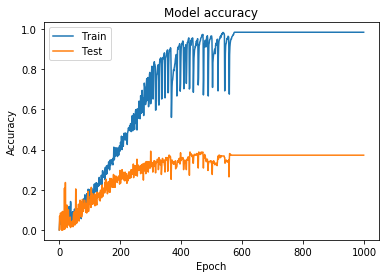

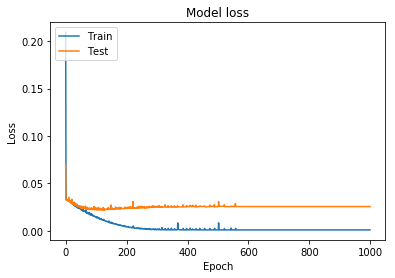

In [20]:
#  build RNN model
model = Sequential()

# RNN cell


model.add(SimpleRNN(
    units =336,
    batch_input_shape=( BATCH_SIZE, TIME_STEPS, INPUT_SIZE),
    #input_dim=INPUT_SIZE,
    #input_length=TIME_STEPS,
    #output_dim=CELL_SIZE,
    #return_sequences=True,
    #stateful=True 
    unroll=True
))

# output layer
#model.add(Flatten())
model.add((Dense(OUTPUT_SIZE)))  #TimeDistributed
model.add(Activation('hard_sigmoid'))
#model.add(Dropout(rate = 0.2)) 

# # optimizer
#
# optimizer

rmsprop = RMSprop(lr=LR, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(optimizer=rmsprop,
              loss='mse',
              metrics=['accuracy'])

# # training
#

# for step in range(51):
#     # data shape = (batch_num, steps, inputs/outputs)
#     X_batch = X_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :, :]
#     Y_batch = y_train[BATCH_INDEX: BATCH_INDEX + BATCH_SIZE, :]
#     cost = model.train_on_batch(X_batch, Y_batch)
#     BATCH_INDEX += BATCH_SIZE
#     BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

#     if step % 50 == 0:
#         print('Next_Train----------: step = ', step)
#         train_cost, train_accuracy = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=False)
#         print('train_cost: ', train_cost, 'train_accuracy: ', train_accuracy)
#         cost, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=False)
#         print('test cost: ', cost, 'test accuracy: ', accuracy)
        
       

print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000, shuffle=True, batch_size=250, verbose=1)

# Plot training & validation accuracy values
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# get_3rd_layer_output = K.function([model.layers[0].input],
#                                   [model.layers[1].output])
# layer_output1 = get_3rd_layer_output([X_train])[0]

# print(layer_output1)
